Mount the Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
dataset_path='/content/drive/MyDrive/melanoma_cancer_dataset'

In [ ]:
!ls "/content/drive/My Drive/melanoma_cancer_dataset"

ensemble_of_ensembles_model.pkl  model.pkl  model_vit.pkl  test  train


**Random Images Of Train Folder Images**

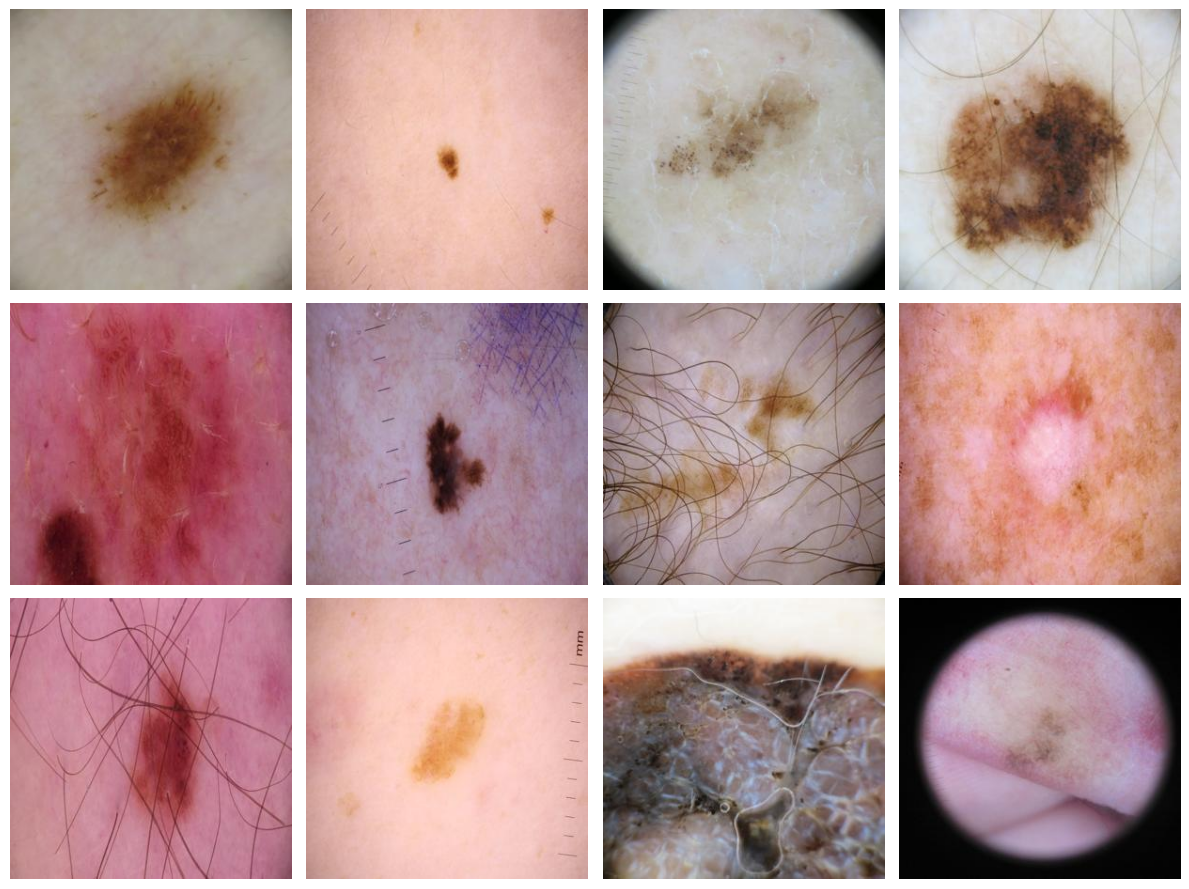

In [ ]:
# prompt: print 12 train folder images from melanoma_cancer_dataset from drive

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Get the list of all files in the train folder
train_folder = os.path.join(dataset_path, 'train')

# Get all image files from both benign and malignant subdirectories
image_files = []
for subdir in ['benign', 'malignant']:
    subdir_path = os.path.join(train_folder, subdir)
    image_files.extend([os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]) # Adjust file extensions as needed

# Select 12 random files from the image files list
selected_files = random.sample(image_files, 12)

# Display images in a 3x4 grid
plt.figure(figsize=(12, 9)) # Adjust figure size as needed
for i, file in enumerate(selected_files):
    plt.subplot(3, 4, i + 1) # 3 rows, 4 columns
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off') # Turn off axis labels

plt.tight_layout()
plt.show()

**Random Images Of Test Folder Images**

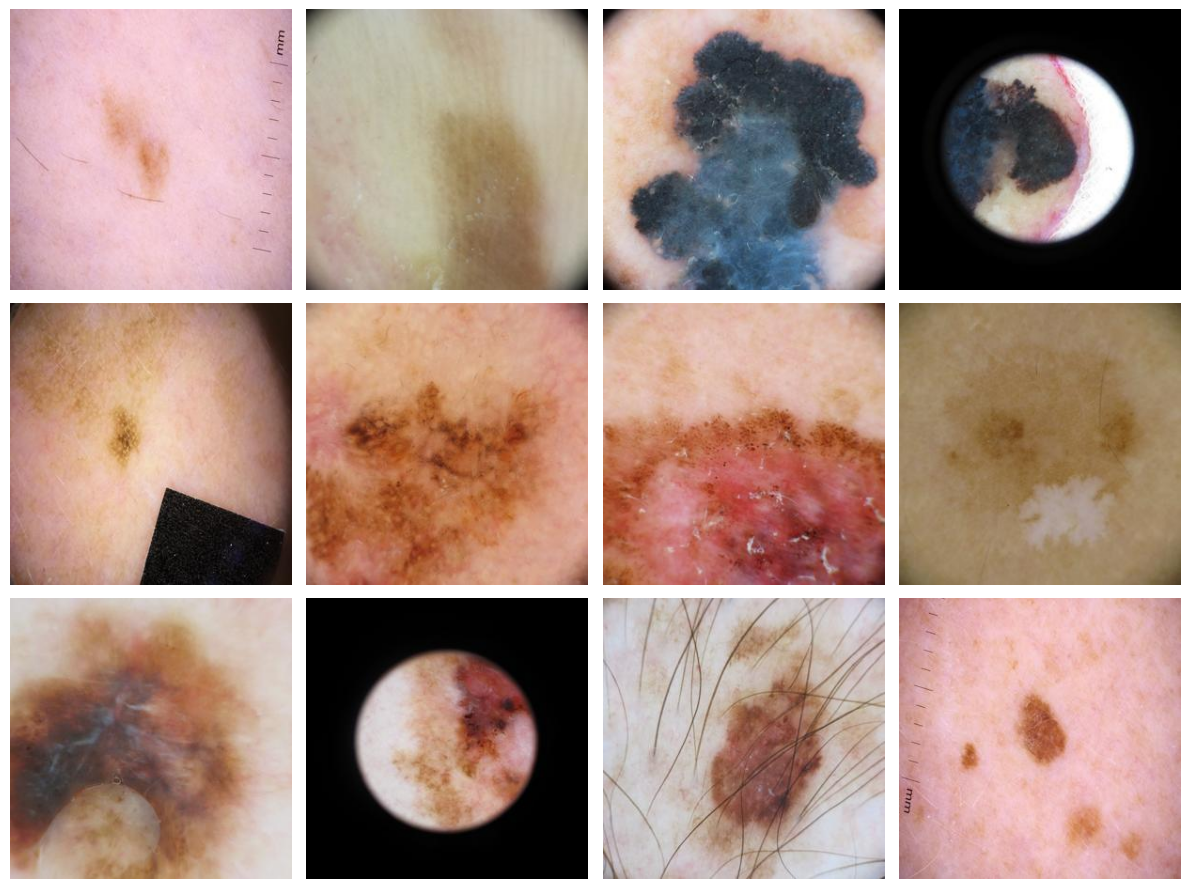

In [ ]:
# prompt: print 12 test folder images from melanoma_cancer_dataset from drive

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

# Get the list of all files in the test folder
test_folder = os.path.join(dataset_path, 'test')

# Get all image files from both benign and malignant subdirectories
image_files = []
for subdir in ['benign', 'malignant']:
    subdir_path = os.path.join(test_folder, subdir)
    image_files.extend([os.path.join(subdir_path, f) for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]) # Adjust file extensions as needed

# Select 12 random files from the image files list
selected_files = random.sample(image_files, 12)

# Display images in a 3x4 grid
plt.figure(figsize=(12, 9)) # Adjust figure size as needed
for i, file in enumerate(selected_files):
    plt.subplot(3, 4, i + 1) # 3 rows, 4 columns
    img = mpimg.imread(file)
    plt.imshow(img)
    plt.axis('off') # Turn off axis labels

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2 as cv
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg19 import VGG19
#EfficientNetV2L
#from keras.applications.efficientnet import EfficientNetV2L
from keras.applications.efficientnet import EfficientNetB0
from tensorflow.keras.applications.mobilenet import MobileNet
from sklearn.ensemble import VotingClassifier

In [ ]:
#Preprocessing and loading the data into the output_data list

def input_data(folder_path, output_data):
    for dirs in os.listdir(folder_path):
        class_name = dirs
        new_path = os.path.join(folder_path, class_name)
        for img in os.listdir(new_path):
            img_arr = cv.imread(os.path.join(new_path, img), cv.IMREAD_COLOR)
            resize = cv.resize(img_arr, (128,128))
            img = cv.cvtColor(img_arr, cv.COLOR_RGB2BGR)
            output_data.append([resize, class_name])
    return output_data

In [ ]:
train_data = input_data(r"/content/drive/MyDrive/melanoma_cancer_dataset/train", [])
test_data = input_data(r"/content/drive/MyDrive/melanoma_cancer_dataset/test", [])

In [ ]:
#shuffling the data
np.random.shuffle(train_data)
np.random.shuffle(test_data)

In [ ]:
#separating the image and labels from the train_data list
X_train = []
Y_train = []
for features, labels in train_data:
    X_train.append(features)
    Y_train.append(labels)

In [ ]:
#separating the image and labels from the test_data list
X_test = []
Y_test = []
for features, labels in test_data:
    X_test.append(features)
    Y_test.append(labels)

In [ ]:
#Convert lists to Numpy arrays for easy computation
test_images = np.array(X_test)
test_labels = np.array(Y_test)

In [ ]:
train_images = np.array(X_train)
train_labels = np.array(Y_train)

In [ ]:
#Encoding labels begnin and malignant to 0 and 1

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
#Split data into test and train datasets (already split but assigning to meaningful convention)
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [ ]:
y_train[10:20]

array([1, 1, 1, 0, 0, 0, 0, 0, 1, 1])

In [ ]:
x_train.shape

(9605, 128, 128, 3)

In [ ]:
labels=np.unique(y_test)
print(labels)

[0 1]


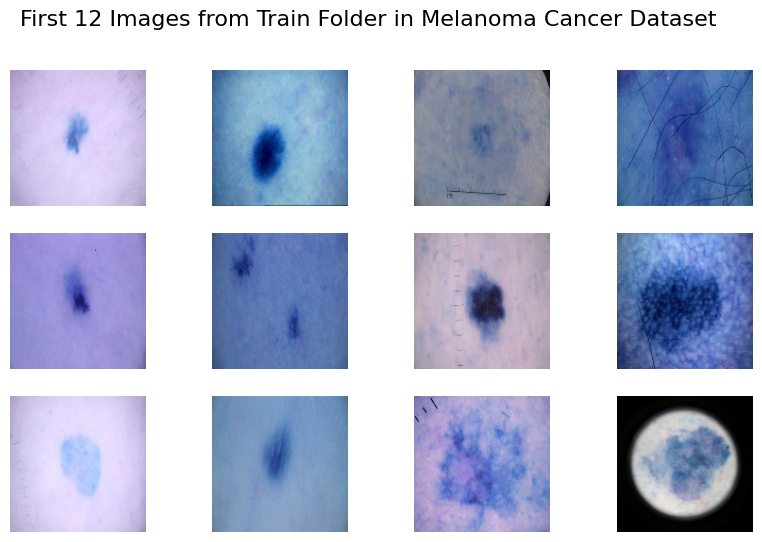

In [ ]:
# printing 12 images of train folder in melanoma_cancer_dataset

import numpy as np
import matplotlib.pyplot as plt

# Get the first 12 images from the train folder
train_images = np.array(X_train[:12])

# Plot the images in a 3x4 grid
fig, axes = plt.subplots(3, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(train_images[i])
    ax.axis('off')

plt.suptitle('First 12 Images from Train Folder in Melanoma Cancer Dataset', fontsize=16)
plt.show()


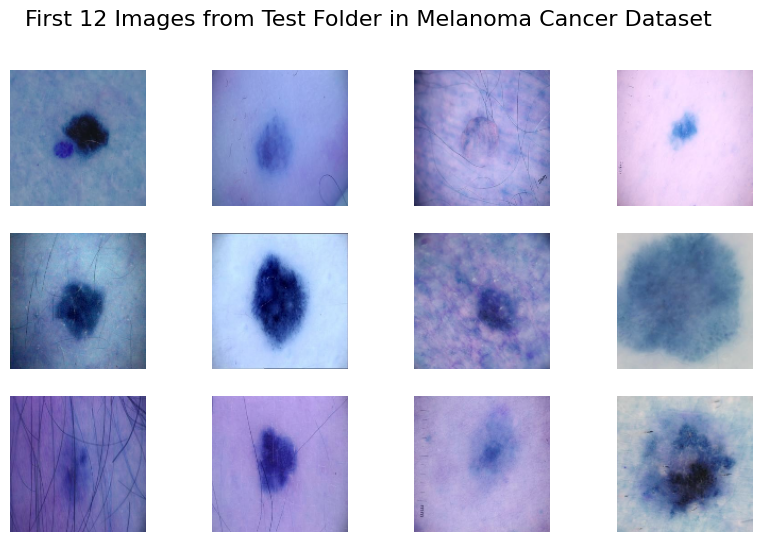

In [ ]:
# prompt: print 12 images of test folder in melanoma_cancer_dataset from drive

import matplotlib.pyplot as plt
import numpy as np
# Get the first 12 images from the test folder
test_images = np.array(X_test[:12])

# Plot the images in a 3x4 grid
fig, axes = plt.subplots(3, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i])
    ax.axis('off')

plt.suptitle('First 12 Images from Test Folder in Melanoma Cancer Dataset', fontsize=16)
plt.show()


In [ ]:
!pip install xgboost
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from keras.applications import VGG19
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
from sklearn.manifold import TSNE

In [ ]:
# Function to evaluate and plot confusion matrix
def evaluate_model(y_true, y_pred, labels, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='micro')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='micro')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='micro')}")
    cm = confusion_matrix(y_true, y_pred)

    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted', fontsize=15)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize=15)
    ax.xaxis.tick_bottom()
    ax.set_ylabel('True', fontsize=15)
    ax.yaxis.set_ticklabels(labels, fontsize=15)
    plt.yticks(rotation=0)
    plt.show()

# **VGG 19**

In [ ]:
# Load the VGG19 model
from keras.layers import GlobalAveragePooling2D
import keras

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
vgg_model = keras.models.Model(inputs=base_model.input, outputs=x)


In [ ]:
#printing model Summary
print(vgg_model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 20,024,384 (76.39 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Feature Extracting using VGG 19
feature_extractor__ = vgg_model.predict(x_train)

301/301 ━━━━━━━━━━━━━━━━━━━━ 25s 60ms/step


In [ ]:
fe___test = vgg_model.predict(x_test)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 185ms/step


In [ ]:
features__ = feature_extractor__.reshape(feature_extractor__.shape[0], -1)
f___test = fe___test.reshape(fe___test.shape[0], -1)
print(f___test.shape)

(1000, 512)


In [ ]:
# Standardize features for above cells

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features__)
scaled_test_features = scaler.transform(f___test)

print("Standardized features shape:", scaled_features.shape)
print("Standardized test features shape:", scaled_test_features.shape)


Standardized features shape: (9605, 512)
Standardized test features shape: (1000, 512)


In [ ]:
# Labels
labels = ['Class 1', 'Class 2']

In [ ]:
# Dictionary to store results
results = {}

Model: K-Nearest Neighbors
Accuracy: 0.917
Precision: 0.917
Recall: 0.917
F1 Score: 0.917


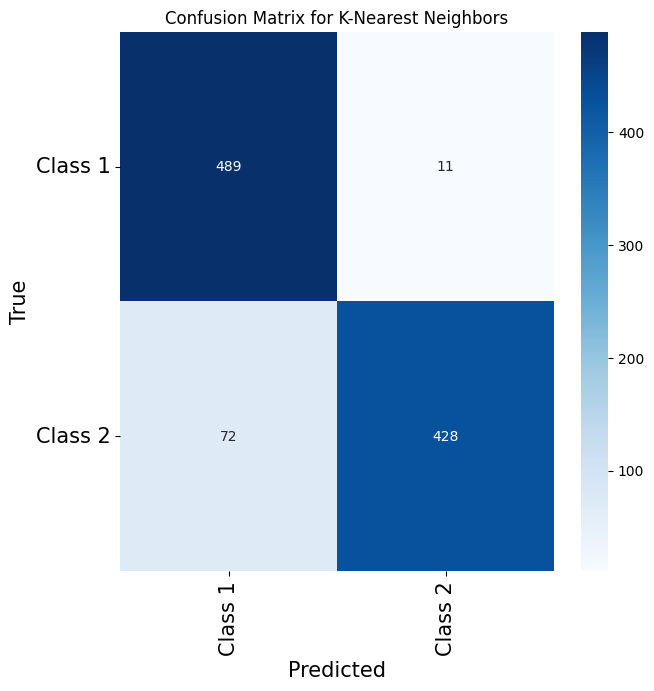

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features__, y_train)
y_pred_knn = knn.predict(f___test)

# Check if y_pred_knn is multilabel-indicator and convert if necessary
if y_pred_knn.ndim > 1 and y_pred_knn.shape[1] > 1:
    y_pred_knn = np.argmax(y_pred_knn, axis=1)  # Convert to single column with class indices

evaluate_model(y_test, y_pred_knn, labels, "K-Nearest Neighbors")
results['KNN'] = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='micro'),
                  recall_score(y_test, y_pred_knn, average='micro'), f1_score(y_test, y_pred_knn, average='micro')]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.907
Precision: 0.907
Recall: 0.907
F1 Score: 0.907


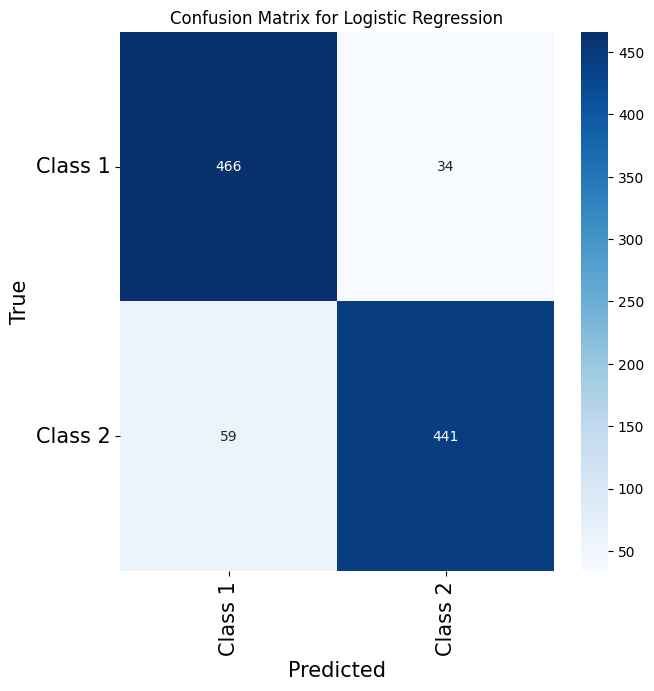

In [ ]:
# Logistic Regression
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features__, y_train)
y_pred_lr = lrm.predict(f___test)
evaluate_model(y_test, y_pred_lr, labels, "Logistic Regression")
results['Logistic Regression'] = [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='micro'), recall_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_lr, average='micro')]


Model: Random Forest
Accuracy: 0.908
Precision: 0.908
Recall: 0.908
F1 Score: 0.908


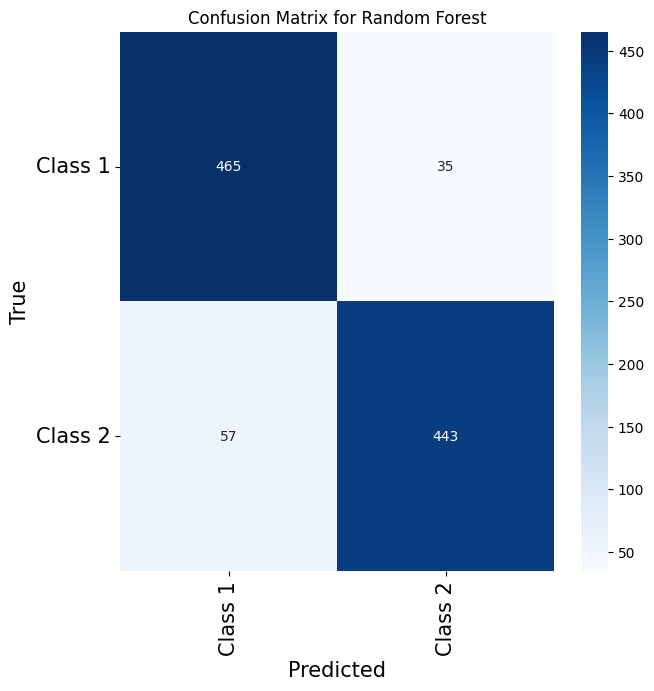

In [ ]:
# Random Forest
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(features__, y_train)
y_pred_rf = RF_model.predict(f___test)
evaluate_model(y_test, y_pred_rf, labels, "Random Forest")
results['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='micro'), recall_score(y_test, y_pred_rf, average='micro'), f1_score(y_test, y_pred_rf, average='micro')]


Model: XGBoost
Accuracy: 0.915
Precision: 0.915
Recall: 0.915
F1 Score: 0.915


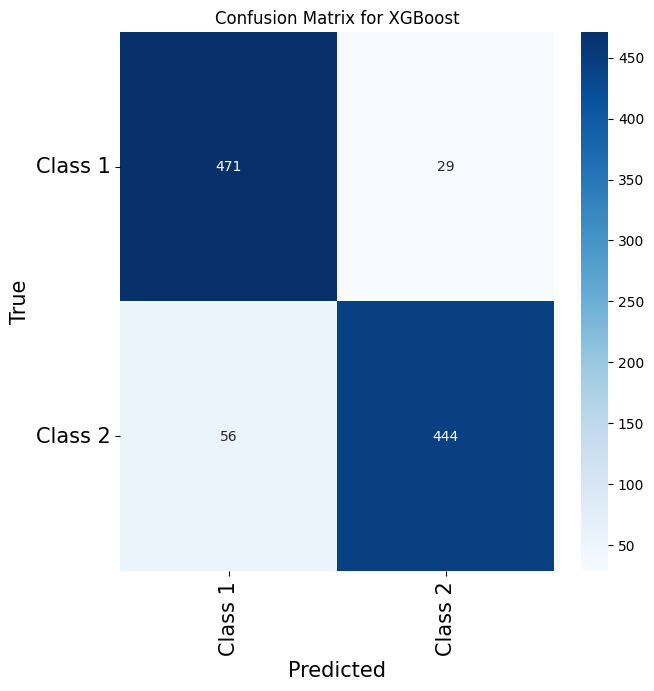

In [ ]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(tree_method="auto")
xgb_classifier.fit(features__, y_train)
y_pred_xgb = xgb_classifier.predict(f___test)
evaluate_model(y_test, y_pred_xgb, labels, "XGBoost")
results['XGBoost'] = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb, average='micro'), recall_score(y_test, y_pred_xgb, average='micro'), f1_score(y_test, y_pred_xgb, average='micro')]


Model: SVC
Accuracy: 0.914
Precision: 0.914
Recall: 0.914
F1 Score: 0.914


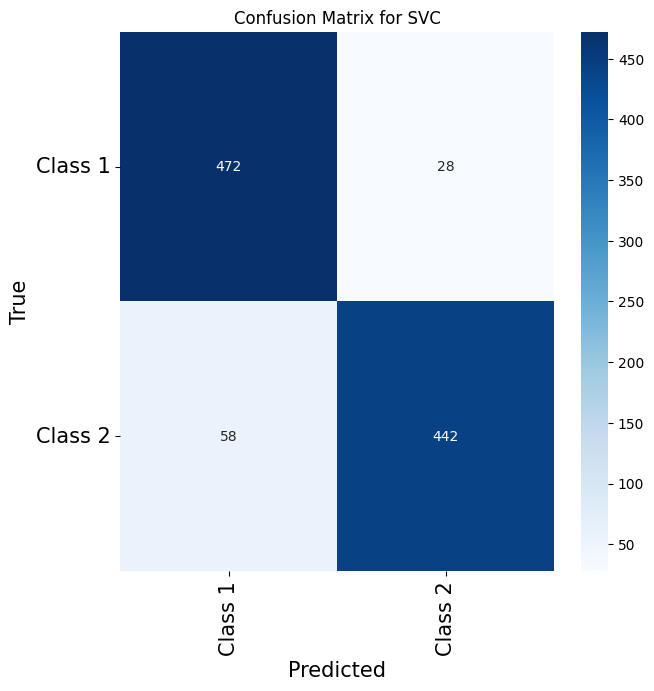

In [ ]:
#SVC
svc = SVC(C=0.65, random_state=0, kernel='rbf')
svc.fit(features__, y_train)
y_pred_svc = svc.predict(f___test)
evaluate_model(y_test, y_pred_svc, labels, "SVC")
results['SVC'] = [accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc, average='micro'), recall_score(y_test, y_pred_svc, average='micro'), f1_score(y_test, y_pred_svc, average='micro')]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Ensemble Voting Classifier
Accuracy: 0.914
Precision: 0.914
Recall: 0.914
F1 Score: 0.914


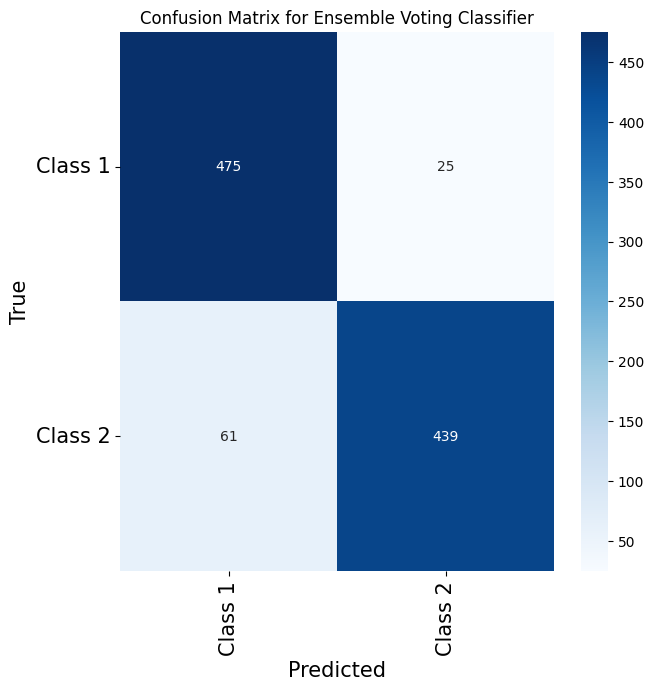

In [ ]:
# Ensemble Voting Classifier
final_model = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', xgb_classifier),
    ('knn', knn),
    ('svc', svc),
    ('lr', lrm)
], voting='hard')

final_model.fit(features__, y_train)
y_pred_final = final_model.predict(f___test)
evaluate_model(y_test, y_pred_final, labels, "Ensemble Voting Classifier")
results['Ensemble'] = [accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final, average='micro'), recall_score(y_test, y_pred_final, average='micro'), f1_score(y_test, y_pred_final, average='micro')]


In [ ]:
# prompt: print the results table of VGG 19 model

import tabulate

# Create the table
table = [
    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    ['KNN', results['KNN'][0], results['KNN'][1], results['KNN'][2], results['KNN'][3]],
    ['Logistic Regression', results['Logistic Regression'][0], results['Logistic Regression'][1], results['Logistic Regression'][2], results['Logistic Regression'][3]],
    ['Random Forest', results['Random Forest'][0], results['Random Forest'][1], results['Random Forest'][2], results['Random Forest'][3]],
    ['XGBoost', results['XGBoost'][0], results['XGBoost'][1], results['XGBoost'][2], results['XGBoost'][3]],
    ['SVC', results['SVC'][0], results['SVC'][1], results['SVC'][2], results['SVC'][3]],
    ['Ensemble', results['Ensemble'][0], results['Ensemble'][1], results['Ensemble'][2], results['Ensemble'][3]],
]

# Print the table
print(tabulate.tabulate(table, headers='firstrow', tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| KNN                 |      0.917 |       0.917 |    0.917 |      0.917 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |      0.907 |       0.907 |    0.907 |      0.907 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |      0.908 |       0.908 |    0.908 |      0.908 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |      0.915 |       0.915 |    0.915 |      0.915 |
+---------------------+------------+-------------+----------+------------+
| SVC                 |      0.914 |       0.914 |    0.914 |      0.914 |
+---------------------+------------+-------------+----------+------------+
| Ensemble            |  

In [ ]:
# prompt: print the parameter table with boxes for above VGG 19 model

from tabulate import tabulate

# Define the table data
table_data = [
    ['Parameter', 'Value'],
    ['Input Shape', '(128, 128, 3)'],
    ['Base Model', 'VGG19'],
    ['Trainable Layers', 'True'],
    ['Feature Extraction Shape', features__.shape],
    ['Standardized Features Shape', scaled_features.shape],
    ['Number of Classes', len(labels)],
    ['KNN Neighbors', 10],
    ['Random Forest Estimators', 50],
    ['XGBoost Tree Method', "auto"],
    ['SVC Kernel', 'rbf'],
    ['SVC C', 0.65],
    ['Voting Classifier', 'Hard'],
]

# Create and print the table
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))


+-----------------------------+---------------+
| Parameter                   | Value         |
+=============================+===============+
| Input Shape                 | (128, 128, 3) |
+-----------------------------+---------------+
| Base Model                  | VGG19         |
+-----------------------------+---------------+
| Trainable Layers            | False         |
+-----------------------------+---------------+
| Feature Extraction Shape    | (9605, 512)   |
+-----------------------------+---------------+
| Standardized Features Shape | (9605, 512)   |
+-----------------------------+---------------+
| Number of Classes           | 2             |
+-----------------------------+---------------+
| KNN Neighbors               | 10            |
+-----------------------------+---------------+
| Random Forest Estimators    | 50            |
+-----------------------------+---------------+
| XGBoost Tree Method         | auto          |
+-----------------------------+---------

In [ ]:
import pickle

# Save the model to a file
with open(r"/content/drive/MyDrive/melanoma_cancer_dataset/model.pkl", "wb") as f:
    pickle.dump(final_model, f)


In [ ]:
# Build a VGG 16 model for feature extracting and perform ML models like above

import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.manifold import TSNE
import pickle
from tabulate import tabulate


In [ ]:

# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
vgg_model = Model(inputs=base_model.input, outputs=x)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:

# Freeze the layers of VGG16
for layer in base_model.layers:
    layer.trainable = True

print(vgg_model.summary())


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 128, 128, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 128, 128, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 64, 64, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 64, 64, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 32, 32, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 32, 32, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 16, 16, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:

# Feature Extractor
feature_extractor__ = vgg_model.predict(x_train)
fe___test = vgg_model.predict(x_test)
features__ = feature_extractor__.reshape(feature_extractor__.shape[0], -1)
f___test = fe___test.reshape(fe___test.shape[0], -1)
print(f___test.shape)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features__)
scaled_test_features = scaler.transform(f___test)

print("Standardized features shape:", scaled_features.shape)
print("Standardized test features shape:", scaled_test_features.shape)


301/301 ━━━━━━━━━━━━━━━━━━━━ 13s 41ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
(1000, 512)
Standardized features shape: (9605, 512)
Standardized test features shape: (1000, 512)


In [ ]:

# Labels
labels = ['Class 1', 'Class 2']

# Dictionary to store results
results = {}

Model: K-Nearest Neighbors
Accuracy: 0.911
Precision: 0.911
Recall: 0.911
F1 Score: 0.911


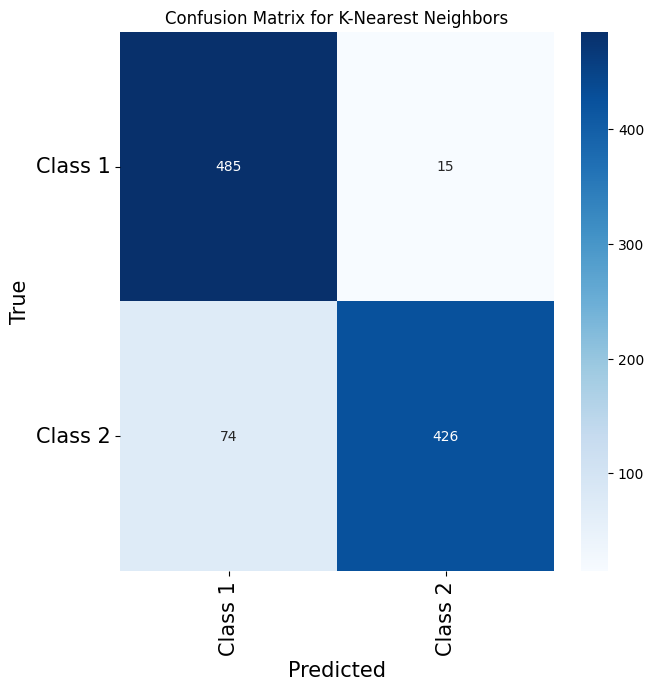

In [ ]:

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features__, y_train)
y_pred_knn = knn.predict(f___test)

# Check if y_pred_knn is multilabel-indicator and convert if necessary
if y_pred_knn.ndim > 1 and y_pred_knn.shape[1] > 1:
    y_pred_knn = np.argmax(y_pred_knn, axis=1)  # Convert to single column with class indices

evaluate_model(y_test, y_pred_knn, labels, "K-Nearest Neighbors")
results['KNN'] = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='micro'),
                  recall_score(y_test, y_pred_knn, average='micro'), f1_score(y_test, y_pred_knn, average='micro')]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
Accuracy: 0.903
Precision: 0.903
Recall: 0.903
F1 Score: 0.903


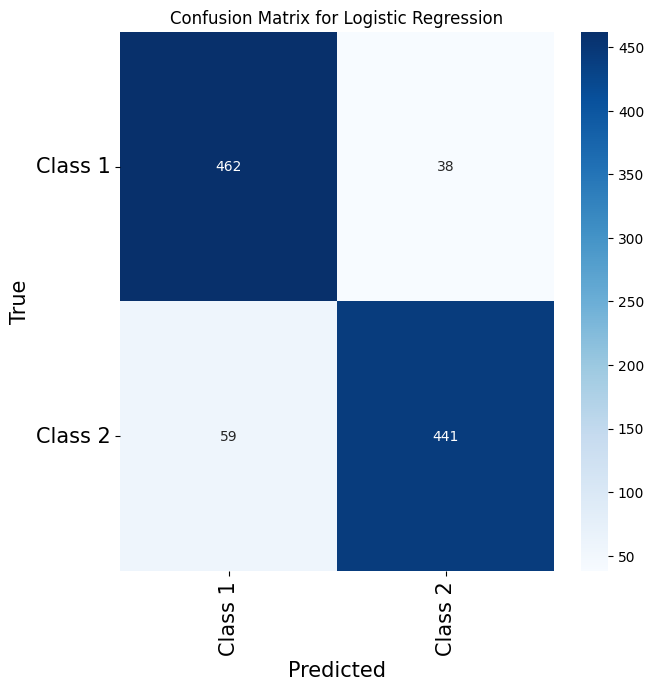

In [ ]:
# Logistic Regression
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features__, y_train)
y_pred_lr = lrm.predict(f___test)
evaluate_model(y_test, y_pred_lr, labels, "Logistic Regression")
results['Logistic Regression'] = [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='micro'), recall_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_lr, average='micro')]


Model: Random Forest
Accuracy: 0.909
Precision: 0.909
Recall: 0.909
F1 Score: 0.909


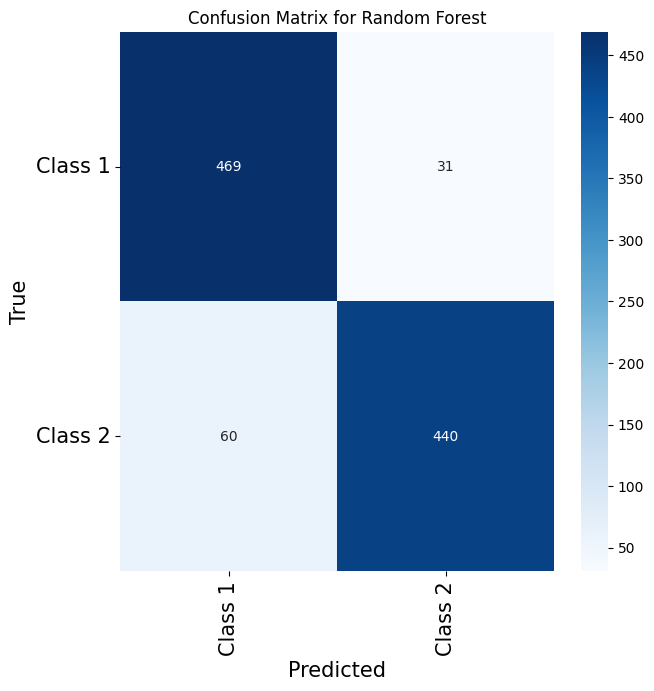

In [ ]:
  # Random Forest
  RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
  RF_model.fit(features__, y_train)
  y_pred_rf = RF_model.predict(f___test)
  evaluate_model(y_test, y_pred_rf, labels, "Random Forest")
  results['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='micro'), recall_score(y_test, y_pred_rf, average='micro'), f1_score(y_test, y_pred_rf, average='micro')]


Model: XGBoost
Accuracy: 0.915
Precision: 0.915
Recall: 0.915
F1 Score: 0.915


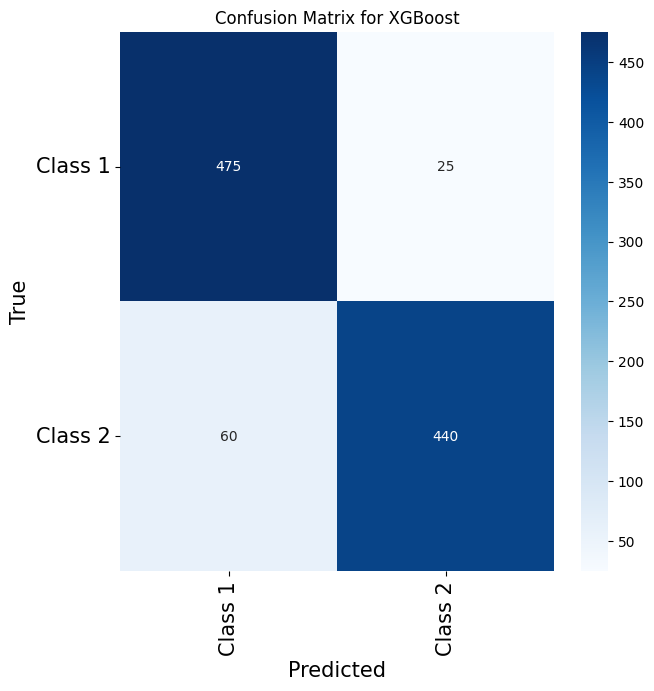

In [ ]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(tree_method="auto")
xgb_classifier.fit(features__, y_train)
y_pred_xgb = xgb_classifier.predict(f___test)
evaluate_model(y_test, y_pred_xgb, labels, "XGBoost")
results['XGBoost'] = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb, average='micro'), recall_score(y_test, y_pred_xgb, average='micro'), f1_score(y_test, y_pred_xgb, average='micro')]


Model: SVC
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


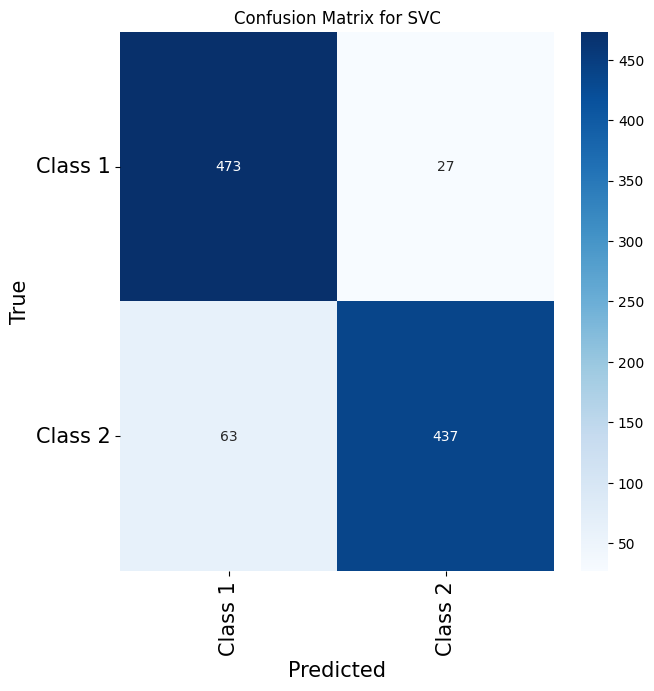

In [ ]:
#SVC
svc = SVC(C=0.65, random_state=0, kernel='rbf')
svc.fit(features__, y_train)
y_pred_svc = svc.predict(f___test)
evaluate_model(y_test, y_pred_svc, labels, "SVC")
results['SVC'] = [accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc, average='micro'), recall_score(y_test, y_pred_svc, average='micro'), f1_score(y_test, y_pred_svc, average='micro')]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Ensemble Voting Classifier
Accuracy: 0.916
Precision: 0.916
Recall: 0.916
F1 Score: 0.916


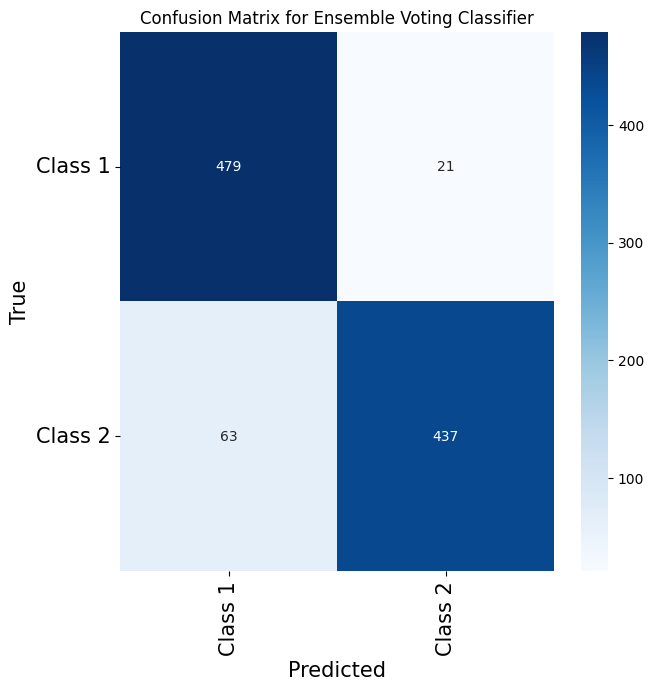

In [ ]:

# Ensemble Voting Classifier
final_model_0 = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', xgb_classifier),
    ('knn', knn),
    ('svc', svc),
    ('lr', lrm)
], voting='hard')

final_model.fit(features__, y_train)
y_pred_final = final_model.predict(f___test)
evaluate_model(y_test, y_pred_final, labels, "Ensemble Voting Classifier")
results['Ensemble'] = [accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final, average='micro'), recall_score(y_test, y_pred_final, average='micro'), f1_score(y_test, y_pred_final, average='micro')]


In [ ]:
# prompt: print the parameter table with boxes for above VGG 16 model

from tabulate import tabulate

# Define the table data
table_data = [
    ['Parameter', 'Value'],
    ['Input Shape', '(128, 128, 3)'],
    ['Base Model', 'VGG16'],
    ['Trainable Layers', 'True'],
    ['Feature Extraction Shape', features__.shape],
    ['Standardized Features Shape', scaled_features.shape],
    ['Number of Classes', len(labels)],
    ['KNN Neighbors', 10],
    ['Random Forest Estimators', 50],
    ['XGBoost Tree Method', "auto"],
    ['SVC Kernel', 'rbf'],
    ['SVC C', 0.65],
    ['Voting Classifier', 'Hard'],
]

# Create and print the table
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))


In [ ]:
!pip install tabulate
from tabulate import tabulate # Make sure to import the 'tabulate' function from the 'tabulate' module

# Create the table
table = [
    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    ['KNN', results['KNN'][0], results['KNN'][1], results['KNN'][2], results['KNN'][3]],
    ['Logistic Regression', results['Logistic Regression'][0], results['Logistic Regression'][1], results['Logistic Regression'][2], results['Logistic Regression'][3]],
    ['Random Forest', results['Random Forest'][0], results['Random Forest'][1], results['Random Forest'][2], results['Random Forest'][3]],
    ['XGBoost', results['XGBoost'][0], results['XGBoost'][1], results['XGBoost'][2], results['XGBoost'][3]],
    ['SVC', results['SVC'][0], results['SVC'][1], results['SVC'][2], results['SVC'][3]],
    ['Ensemble', results['Ensemble'][0], results['Ensemble'][1], results['Ensemble'][2], results['Ensemble'][3]],
]

# Print the table
print(tabulate(table, headers='firstrow', tablefmt='grid'))



# Define the table data
table_data = [
    ['Parameter', 'Value'],
    ['Input Shape', '(128, 128, 3)'],
    ['Base Model', 'VGG16'],
    ['Trainable Layers', 'False'],
    ['Feature Extraction Shape', features__.shape],
    ['Standardized Features Shape', scaled_features.shape],
    ['Number of Classes', len(labels)],
    ['KNN Neighbors', 10],
    ['Random Forest Estimators', 50],
    ['XGBoost Tree Method', "auto"],
    ['SVC Kernel', 'rbf'],
    ['SVC C', 0.65],
    ['Voting Classifier', 'Hard'],
]

# Create and print the table
print(tabulate(table_data, headers='firstrow', tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| KNN                 |      0.911 |       0.911 |    0.911 |      0.911 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |      0.903 |       0.903 |    0.903 |      0.903 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |      0.909 |       0.909 |    0.909 |      0.909 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |      0.915 |       0.915 |    0.915 |      0.915 |
+---------------------+------------+-------------+----------+------------+
| SVC                 |      0.91  |       0.91  |    0.91  |      0.91  |
+---------------------+------------+-------------+----------+------------+
| Ensemble            |  

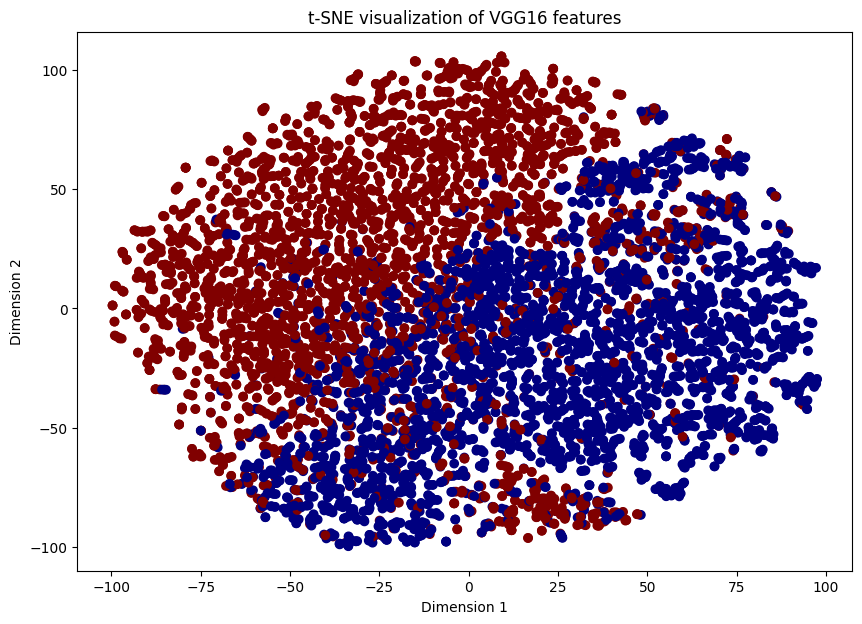

In [ ]:

# Reduce dimensionality with TSNE
tsne = TSNE(n_components=2, learning_rate='auto',
           init='random', perplexity=3)
X_reduced = tsne.fit_transform(scaled_features)

# Plot the results
plt.figure(figsize=(10, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_train, cmap='jet')
plt.title('t-SNE visualization of VGG16 features')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [ ]:

# Save the model
final_model.save('VGG16_model.h5')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from keras.layers import Input, Conv2D, Reshape, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [ ]:
# prompt: load the Capsnet.py in Colab Notebooks from drive

!cp "/content/drive/MyDrive/Colab Notebooks/Capsnet.py" "/content"

In [ ]:
# Initialize and load the CapsNet model
from Capsnet import CapsNet
capsnet_model = CapsNet(input_shape=(128, 128, 3), num_classes=3)

In [ ]:
# Function to evaluate and plot confusion matrix
def evaluate_model(y_true, y_pred, labels, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='micro')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='micro')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='micro')}")
    cm = confusion_matrix(y_true, y_pred)

    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted', fontsize=15)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize=15)
    ax.xaxis.tick_bottom()
    ax.set_ylabel('True', fontsize=15)
    ax.yaxis.set_ticklabels(labels, fontsize=15)
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
!pip install tensorflow

import tensorflow as tf
# Initialize and load the CapsNet model
from Capsnet import CapsNet
capsnet_model = CapsNet(input_shape=(128, 128, 3), num_classes=3)

# Make layers non-trainable
for layer in capsnet_model.layers:
    layer.trainable = True

# Modify the final layer of the CapsNet to match the label shape
flattened_output = tf.keras.layers.Flatten()(capsnet_model.layers[-2].output) # Flatten the output of the second last layer
output_layer = tf.keras.layers.Dense(3, activation='softmax')(flattened_output) # Add a dense layer with softmax activation for 3 classes

# Recreate the model with the modified layers
capsnet_model = tf.keras.models.Model(inputs=capsnet_model.input, outputs=output_layer)

# Compile the model with appropriate loss and optimizer
capsnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# One-hot encode the target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)  # Assuming 3 classes

# Train the CapsNet model with one-hot encoded labels
capsnet_model.fit(x_train, y_train_encoded, epochs=20, batch_size=32)

# One-hot encode the test labels as well
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Evaluate the CapsNet model on the test data using one-hot encoded labels
accuracy = capsnet_model.evaluate(x_test, y_test_encoded)[1]
print("Accuracy:", accuracy)

# Extract features from the trained CapsNet model
feature_extractor__ = capsnet_model.predict(x_train)
fe___test = capsnet_model.predict(x_test)

features__ = feature_extractor__.reshape(feature_extractor__.shape[0], -1)
f___test = fe___test.reshape(fe___test.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
features__ = scaler.fit_transform(features__)
f___test = scaler.transform(f___test)

Epoch 1/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 14s 22ms/step - accuracy: 0.6156 - loss: 56.0019
Epoch 2/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.8018 - loss: 0.5002
Epoch 3/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.8292 - loss: 0.3961
Epoch 4/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.8471 - loss: 0.3745
Epoch 5/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.8521 - loss: 0.3552
Epoch 6/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.8583 - loss: 0.3336
Epoch 7/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.8649 - loss: 0.3282
Epoch 8/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8022 - loss: 0.4472
Epoch 9/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8007 - loss: 0.4617
Epoch 10/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8001 - loss: 0.4540
Epoch 11/20
301/301 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8328 - loss: 0.3844
Epoch 12/20
301/301 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Labels
labels = ['Class 1', 'Class 2']

In [ ]:
# Dictionary to store results
resultsc = {}

Model: K-Nearest Neighbors
Accuracy: 0.862
Precision: 0.862
Recall: 0.862
F1 Score: 0.8619999999999999


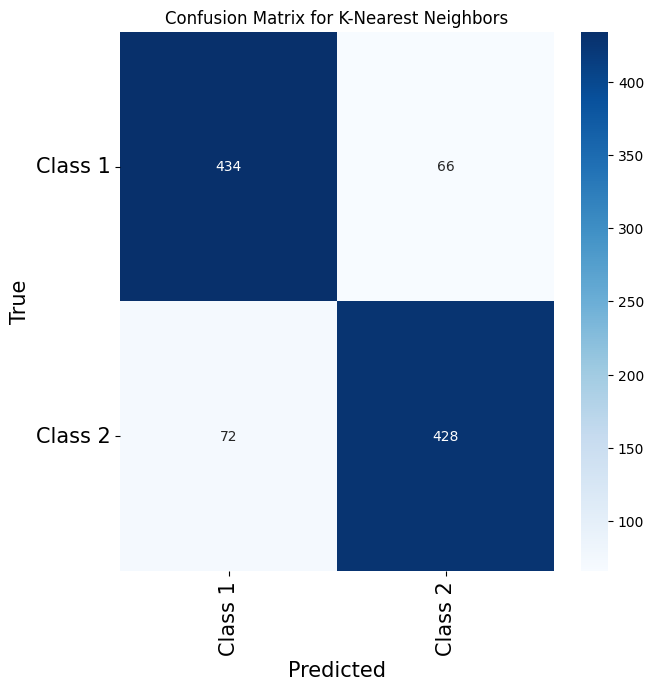

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features__, y_train)
y_pred_knn = knn.predict(f___test)
evaluate_model(y_test, y_pred_knn, labels, "K-Nearest Neighbors")
resultsc['KNN'] = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='micro'), recall_score(y_test, y_pred_knn, average='micro'), f1_score(y_test, y_pred_knn, average='micro')]


Model: Logistic Regression
Accuracy: 0.859
Precision: 0.859
Recall: 0.859
F1 Score: 0.859


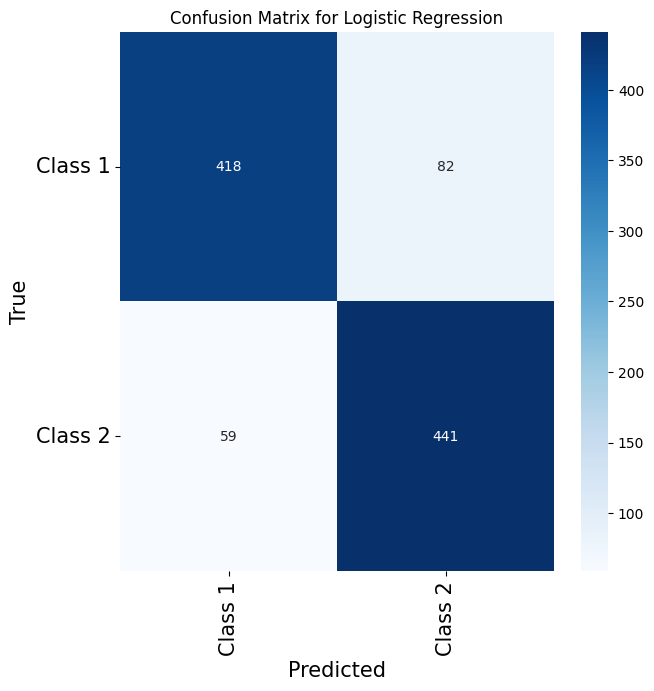

In [ ]:
# Logistic Regression
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features__, y_train)
y_pred_lr = lrm.predict(f___test)
evaluate_model(y_test, y_pred_lr, labels, "Logistic Regression")
resultsc['Logistic Regression'] = [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='micro'), recall_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_lr, average='micro')]

Model: Random Forest
Accuracy: 0.849
Precision: 0.849
Recall: 0.849
F1 Score: 0.849


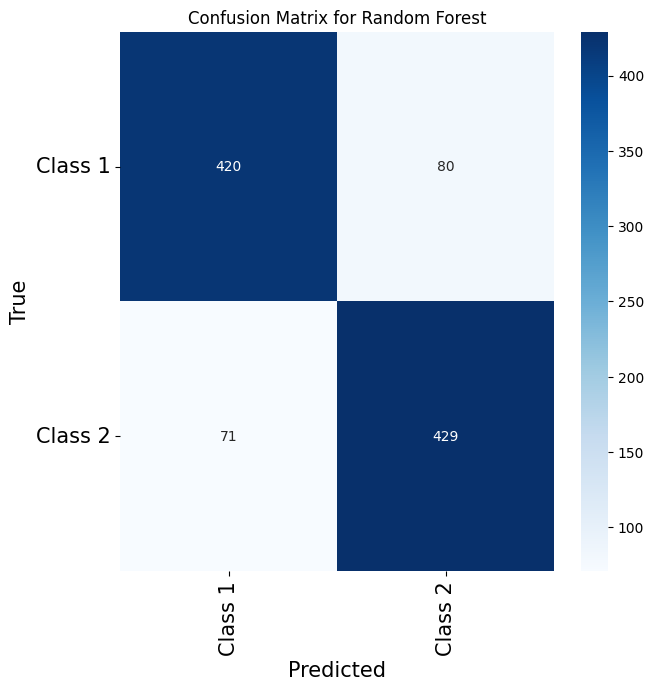

In [ ]:

# Random Forest
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(features__, y_train)
y_pred_rf = RF_model.predict(f___test)
evaluate_model(y_test, y_pred_rf, labels, "Random Forest")
resultsc['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='micro'), recall_score(y_test, y_pred_rf, average='micro'), f1_score(y_test, y_pred_rf, average='micro')]



Model: XGBoost
Accuracy: 0.861
Precision: 0.861
Recall: 0.861
F1 Score: 0.861


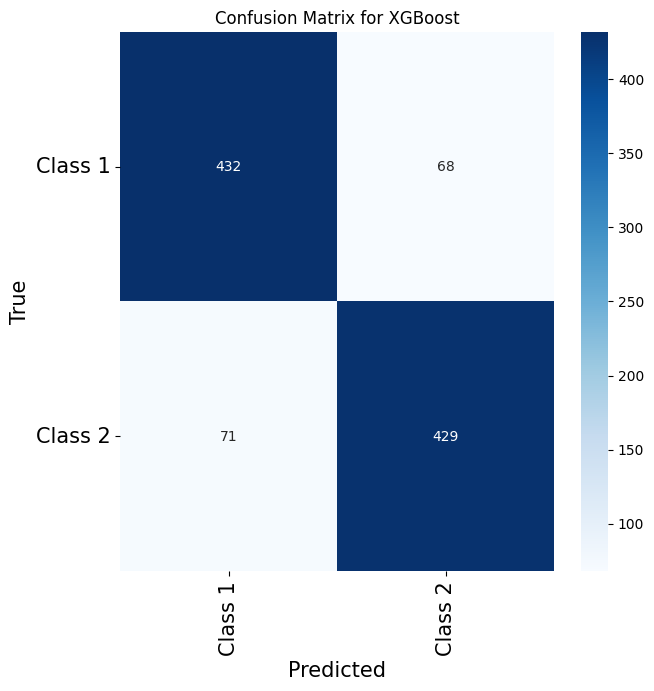

In [ ]:

# XGBoost
xgb_classifier = xgb.XGBClassifier(tree_method="auto")
xgb_classifier.fit(features__, y_train)
y_pred_xgb = xgb_classifier.predict(f___test)
evaluate_model(y_test, y_pred_xgb, labels, "XGBoost")
resultsc['XGBoost'] = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb, average='micro'), recall_score(y_test, y_pred_xgb, average='micro'), f1_score(y_test, y_pred_xgb, average='micro')]


Model: SVC
Accuracy: 0.865
Precision: 0.865
Recall: 0.865
F1 Score: 0.865


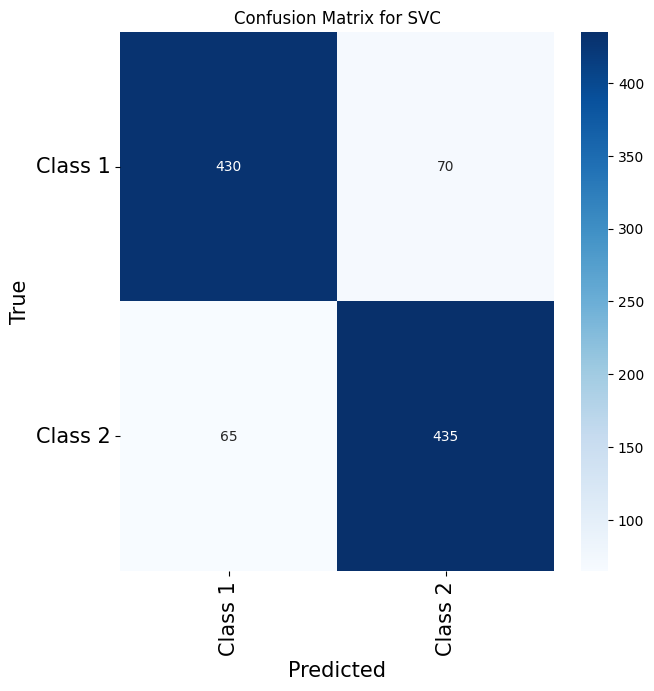

In [ ]:
# SVC
svc = SVC(C=0.65, random_state=0, kernel='rbf', probability=True)

# Enable probability estimation
svc.fit(features__, y_train)
y_pred_svc = svc.predict(f___test)
evaluate_model(y_test, y_pred_svc, labels, "SVC")
resultsc['SVC'] = [accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc, average='micro'), recall_score(y_test, y_pred_svc, average='micro'), f1_score(y_test, y_pred_svc, average='micro')]



Model: Ensemble Voting Classifier
Accuracy: 0.864
Precision: 0.864
Recall: 0.864
F1 Score: 0.864


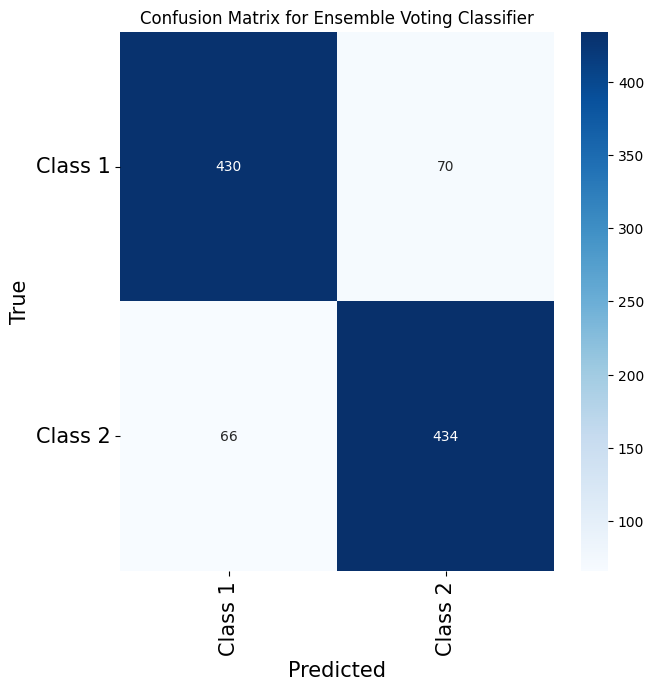

In [ ]:

# Ensemble Voting Classifier
final_model_1 = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', xgb_classifier),
    ('knn', knn),
    ('svc', svc),
    ('lr', lrm)
], voting='hard')

final_model_1.fit(features__, y_train)
y_pred_final = final_model_1.predict(f___test)
evaluate_model(y_test, y_pred_final, labels, "Ensemble Voting Classifier")
resultsc['Ensemble'] = [accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final, average='micro'), recall_score(y_test, y_pred_final, average='micro'), f1_score(y_test, y_pred_final, average='micro')]


In [ ]:
  # prompt: print the results in a table with boxes like parameter table in below

  from tabulate import tabulate

  # Create a table with the results
  table1 = [
      ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
      ['KNN', resultsc['KNN'][0], resultsc['KNN'][1], resultsc['KNN'][2], resultsc['KNN'][3]],
      ['Logistic Regression', resultsc['Logistic Regression'][0], resultsc['Logistic Regression'][1], resultsc['Logistic Regression'][2], resultsc['Logistic Regression'][3]],
      ['Random Forest', resultsc['Random Forest'][0], resultsc['Random Forest'][1], resultsc['Random Forest'][2], resultsc['Random Forest'][3]],
      ['XGBoost', resultsc['XGBoost'][0], resultsc['XGBoost'][1], resultsc['XGBoost'][2], resultsc['XGBoost'][3]],
      ['SVC', resultsc['SVC'][0], resultsc['SVC'][1], resultsc['SVC'][2], resultsc['SVC'][3]],
      ['Ensemble', resultsc['Ensemble'][0], resultsc['Ensemble'][1], resultsc['Ensemble'][2], resultsc['Ensemble'][3]],
  ]

  # Print the table
  print(tabulate(table1, headers='firstrow', tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| KNN                 |      0.862 |       0.862 |    0.862 |      0.862 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |      0.859 |       0.859 |    0.859 |      0.859 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |      0.849 |       0.849 |    0.849 |      0.849 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |      0.861 |       0.861 |    0.861 |      0.861 |
+---------------------+------------+-------------+----------+------------+
| SVC                 |      0.865 |       0.865 |    0.865 |      0.865 |
+---------------------+------------+-------------+----------+------------+
| Ensemble            |  

In [ ]:

from tabulate import tabulate

# Define the CapsNet model parameters
parametersc = {
    # General parameters
    "input_shape": (128, 128, 3),
    "num_classes": 3,

    # Convolutional layer parameters
    "conv1_filters": 256,
    "conv1_kernel_size": 9,
    "conv1_strides": 1,
    "conv1_padding": "valid",
    "conv1_activation": "relu",

    # PrimaryCaps layer parameters
    "primary_caps_dim": 8,
    "primary_caps_n_caps": 32,
    "primary_caps_strides": 2,
    "primary_caps_padding": "valid",

    # ConvCaps layer parameters
    "conv_caps_dim": 16,
    "conv_caps_n_caps": 32,
    "conv_caps_kernel_size": 9,
    "conv_caps_strides": 2,
    "conv_caps_padding": "valid",

    # DenseCaps layer parameters
    "dense_caps_dim": 16,
    "dense_caps_n_caps": 3,

    # Decoder network parameters
    "decoder_network_architecture": [512, 1024, 784],
    "decoder_network_activation": "sigmoid",

    # Training parameters
    "optimizer": "adam",
    "learning_rate": 0.0001,
    "epochs": 10,
    "batch_size": 32,

    # Regularization parameters
    "regularization_scale": 0.0005,
    "max_norm": 5.0,
}

# Convert the parameters dictionary to a list of lists for tabulate
table_data1 = [[key, value] for key, value in parametersc.items()]

# Print the parameter table
print(tabulate(table_data1, headers=["Parameter", "Value"], tablefmt="grid"))

+------------------------------+------------------+
| Parameter                    | Value            |
+==============================+==================+
| input_shape                  | (128, 128, 3)    |
+------------------------------+------------------+
| num_classes                  | 3                |
+------------------------------+------------------+
| conv1_filters                | 256              |
+------------------------------+------------------+
| conv1_kernel_size            | 9                |
+------------------------------+------------------+
| conv1_strides                | 1                |
+------------------------------+------------------+
| conv1_padding                | valid            |
+------------------------------+------------------+
| conv1_activation             | relu             |
+------------------------------+------------------+
| primary_caps_dim             | 8                |
+------------------------------+------------------+
| primary_ca

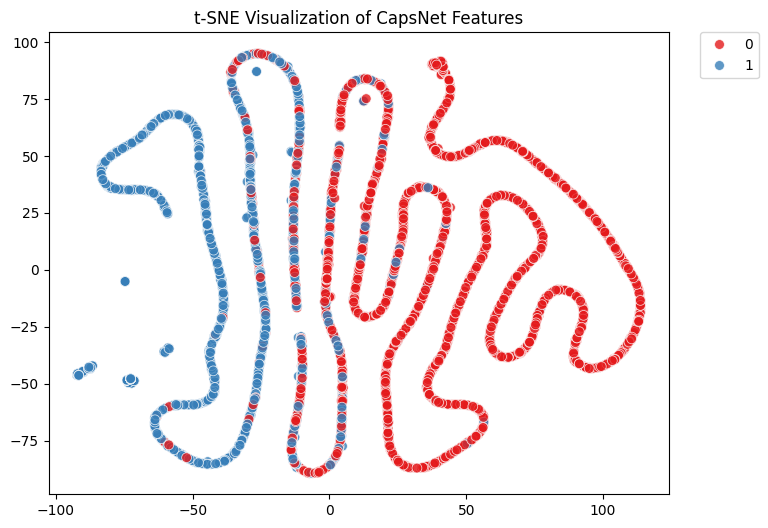

In [ ]:
# t-SNE Visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(features__)

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded[:, 0], y=X_embedded[:, 1], hue=y_train, palette='Set1', s=50, alpha=0.8)
plt.title('t-SNE Visualization of CapsNet Features')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [ ]:

# Save the model
final_model.save('Capsnet_model.h5')

In [ ]:
!cp "/content/drive/MyDrive/Colab Notebooks/VisionTransformer.py" "/content"

In [ ]:
import math
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.manifold import TSNE
from tensorflow.keras import layers,models
from tensorflow.keras.models import Model



In [ ]:
from VisionTransformer import ViT
vit_model = ViT(input_shape = (128, 128, 3), num_classes = 2, num_transformer_blocks = 4,embed_dim = 32 , num_heads = 8 , ff_dim = 32, dropout=0.1)

In [ ]:
from tensorflow.keras.optimizers import Adam
vit_model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Print model summary
print(vit_model.summary())

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 128, 128, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 64)   │          1,792 │ input_layer_4[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 128)    │         73,856 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_5           │ (None, 32, 32, 128)    │              0 │ conv2d_5[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 128)            │              0 │ max_pooling2d_5[0][0]  │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_2 (Reshape)       │ (None, 4, 32)          │              0 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention      │ (None, 4, 32)          │         33,568 │ reshape_2[0][0],       │
│ (MultiHeadAttention)      │                        │                │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 4, 32)          │              0 │ multi_head_attention[… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 4, 32)          │              0 │ dropout_1[0][0],       │
│                           │                        │                │ reshape_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization       │ (None, 4, 32)          │             64 │ add[0][0]              │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d (Conv1D)           │ (None, 4, 32)          │          1,056 │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_2 (Dropout)       │ (None, 4, 32)          │              0 │ conv1d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1d_1 (Conv1D)         │ (None, 4, 32)          │          1,056 │ dropout_2[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add_1 (Add)               │ (None, 4, 32)          │              0 │ conv1d_1[0][0],        │
│                           │                        │                │ layer_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_1

 Total params: 218,946 (855.26 KB)

 Trainable params: 218,946 (855.26 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
  # Feature Extraction
  vit_model.fit(x_train, y_train, epochs=15 ,batch_size=32, validation_data=(x_test, y_test))
  feature_extractor = vit_model.predict(x_train)
  fe_test = vit_model.predict(x_test)
  features = feature_extractor.reshape(feature_extractor.shape[0], -1)
  f_test = fe_test.reshape(fe_test.shape[0], -1)

Epoch 1/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 46s 74ms/step - accuracy: 0.5406 - loss: 0.7280 - val_accuracy: 0.7790 - val_loss: 0.5003
Epoch 2/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.7291 - loss: 0.5456 - val_accuracy: 0.8780 - val_loss: 0.3289
Epoch 3/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.8240 - loss: 0.4144 - val_accuracy: 0.8580 - val_loss: 0.3571
Epoch 4/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step - accuracy: 0.8464 - loss: 0.3722 - val_accuracy: 0.8780 - val_loss: 0.3171
Epoch 5/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.8519 - loss: 0.3611 - val_accuracy: 0.8740 - val_loss: 0.2958
Epoch 6/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.8618 - loss: 0.3331 - val_accuracy: 0.8820 - val_loss: 0.2802
Epoch 7/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 8s 27ms/step - accuracy: 0.8657 - loss: 0.3358 - val_accuracy: 0.8670 - val_loss: 0.3372
Epoch 8/15
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8625 - loss: 0.3329 - val

In [ ]:
# Standardizing the features
scaler = StandardScaler()
features = scaler.fit_transform(features)
f_test = scaler.transform(f_test)

In [ ]:
# Function to evaluate and plot confusion matrix
def evaluate_model(y_true, y_pred, labels, model_name):
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred)}")
    print(f"Precision: {precision_score(y_true, y_pred, average='micro')}")
    print(f"Recall: {recall_score(y_true, y_pred, average='micro')}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='micro')}")
    cm = confusion_matrix(y_true, y_pred)

    fig = plt.figure(figsize=(7, 7))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax=ax, cmap="Blues", fmt="g")
    ax.set_title(f'Confusion Matrix for {model_name}')
    ax.set_xlabel('Predicted', fontsize=15)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize=15)
    ax.xaxis.tick_bottom()
    ax.set_ylabel('True', fontsize=15)
    ax.yaxis.set_ticklabels(labels, fontsize=15)
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
# Labels
labels = ['Class 1', 'Class 2']

In [ ]:
# Dictionary to store results
resultsv = {}


Model: K-Nearest Neighbors
Accuracy: 0.888
Precision: 0.888
Recall: 0.888
F1 Score: 0.888


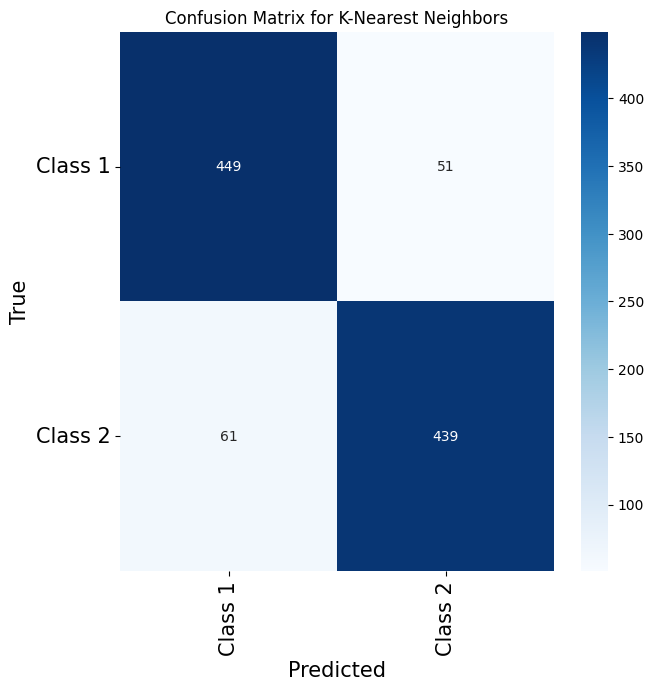

In [ ]:
# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features, y_train)
y_pred_knn = knn.predict(f_test)
evaluate_model(y_test, y_pred_knn, labels, "K-Nearest Neighbors")
resultsv['KNN'] = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='micro'), recall_score(y_test, y_pred_knn, average='micro'), f1_score(y_test, y_pred_knn, average='micro')]



Model: Logistic Regression
Accuracy: 0.887
Precision: 0.887
Recall: 0.887
F1 Score: 0.887


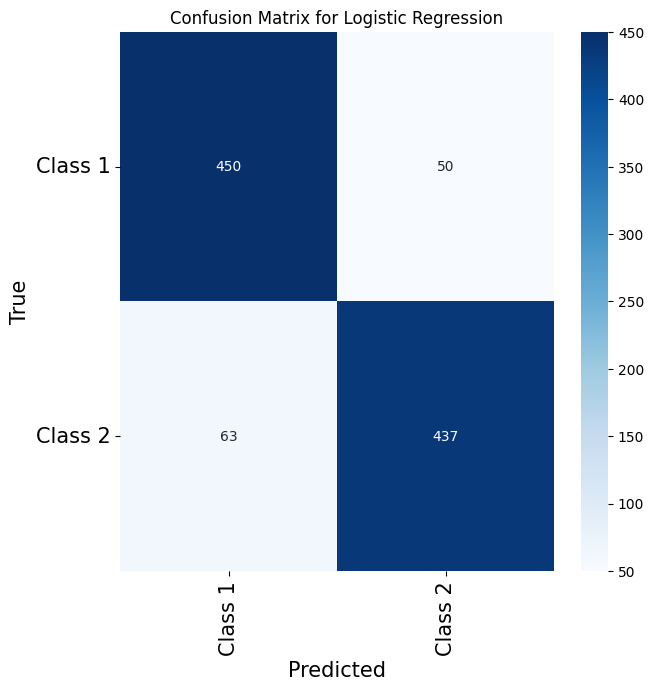

In [ ]:
# Logistic Regression
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features, y_train)
y_pred_lr = lrm.predict(f_test)
evaluate_model(y_test, y_pred_lr, labels, "Logistic Regression")
resultsv['Logistic Regression'] = [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='micro'), recall_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_lr, average='micro')]


Model: Random Forest
Accuracy: 0.851
Precision: 0.851
Recall: 0.851
F1 Score: 0.851


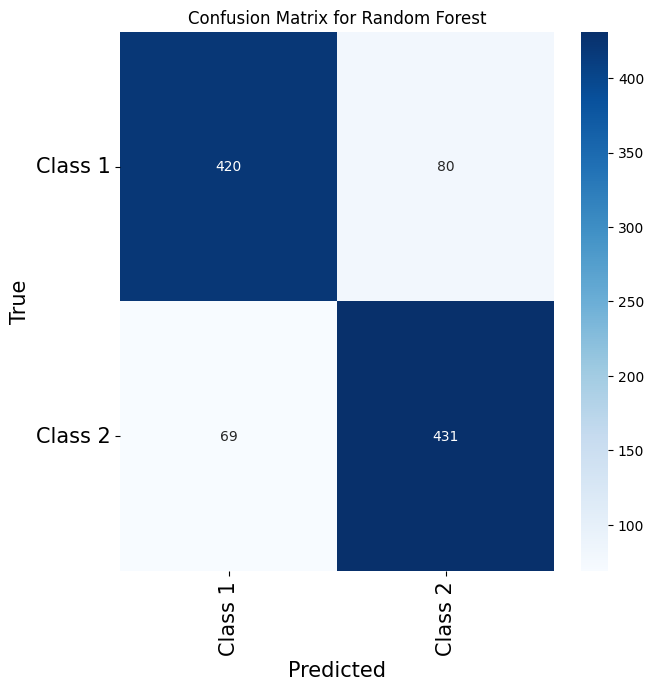

In [ ]:
# Random Forest
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(features, y_train)
y_pred_rf = RF_model.predict(f_test)
evaluate_model(y_test, y_pred_rf, labels, "Random Forest")
resultsv['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='micro'), recall_score(y_test, y_pred_rf, average='micro'), f1_score(y_test, y_pred_rf, average='micro')]


Model: XGBoost
Accuracy: 0.886
Precision: 0.886
Recall: 0.886
F1 Score: 0.886


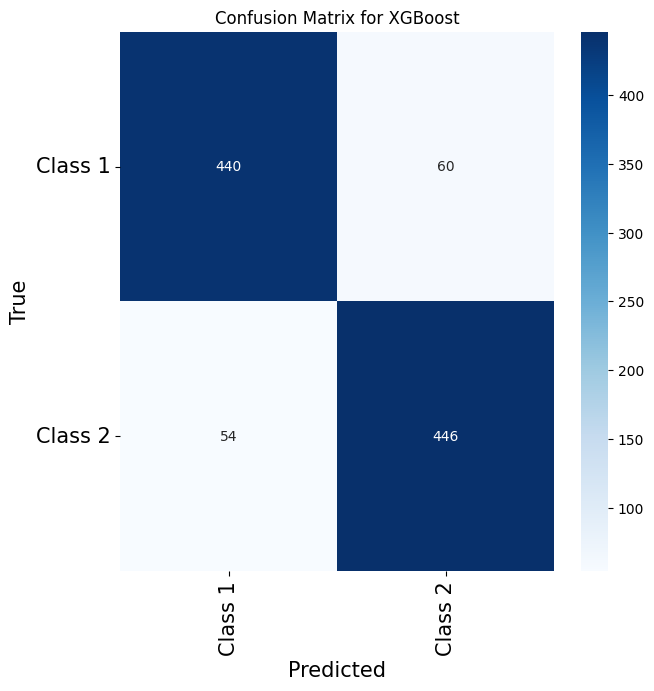

In [ ]:
# XGBoost
xgb_classifier = xgb.XGBClassifier(tree_method="auto")
xgb_classifier.fit(features, y_train)
y_pred_xgb = xgb_classifier.predict(f_test)
evaluate_model(y_test, y_pred_xgb, labels, "XGBoost")
resultsv['XGBoost'] = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb, average='micro'), recall_score(y_test, y_pred_xgb, average='micro'), f1_score(y_test, y_pred_xgb, average='micro')]


Model: SVC
Accuracy: 0.884
Precision: 0.884
Recall: 0.884
F1 Score: 0.884


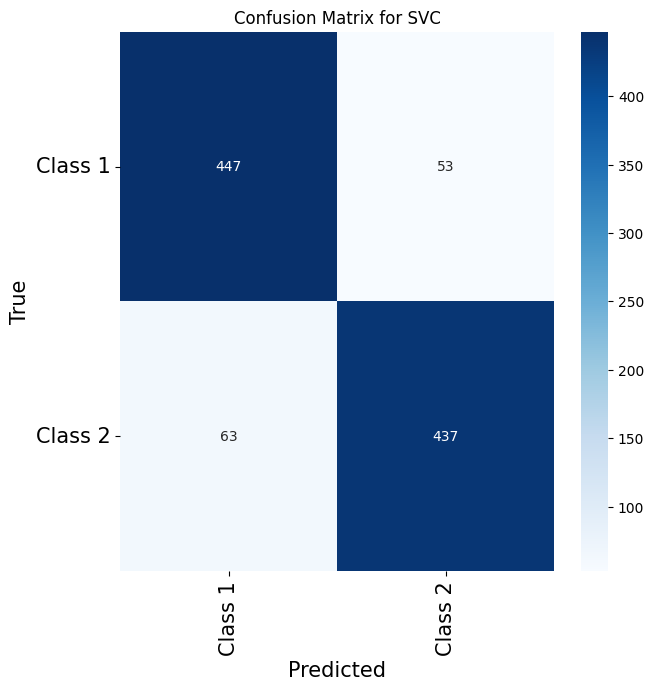

In [ ]:
# SVC
svc = SVC(C=0.65, random_state=0, kernel='rbf')
svc.fit(features, y_train)
y_pred_svc = svc.predict(f_test)
evaluate_model(y_test, y_pred_svc, labels, "SVC")
resultsv['SVC'] = [accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc, average='micro'), recall_score(y_test, y_pred_svc, average='micro'), f1_score(y_test, y_pred_svc, average='micro')]


Model: Ensemble Voting Classifier
Accuracy: 0.889
Precision: 0.889
Recall: 0.889
F1 Score: 0.889


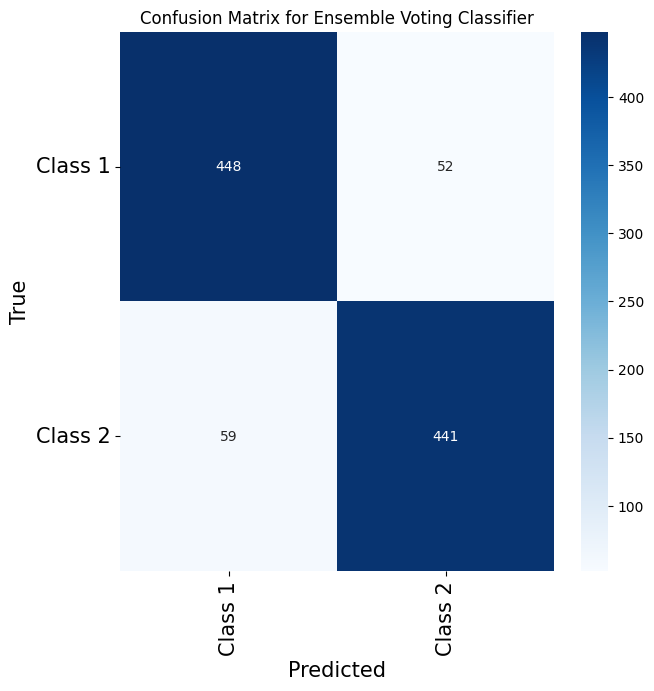

In [ ]:
# Ensemble Voting Classifier
final_model_2 = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', xgb_classifier),
    ('knn', knn),
    ('svc', svc),
    ('lr', lrm)
], voting='hard')

final_model_2.fit(features, y_train)
y_pred_final = final_model_2.predict(f_test)
evaluate_model(y_test, y_pred_final, labels, "Ensemble Voting Classifier")
resultsv['Ensemble'] = [accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final, average='micro'), recall_score(y_test, y_pred_final, average='micro'), f1_score(y_test, y_pred_final, average='micro')]


In [ ]:
# prompt: print results table with boxes for the VisionTransformer model
from tabulate import tabulate
# Create a table with the results
table2 = [
    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    ['KNN', resultsv['KNN'][0], resultsv['KNN'][1], resultsv['KNN'][2], resultsv['KNN'][3]],
    ['Logistic Regression', resultsv['Logistic Regression'][0], resultsv['Logistic Regression'][1], resultsv['Logistic Regression'][2], resultsv['Logistic Regression'][3]],
    ['Random Forest', resultsv['Random Forest'][0], resultsv['Random Forest'][1], resultsv['Random Forest'][2], resultsv['Random Forest'][3]],
    ['XGBoost', resultsv['XGBoost'][0], resultsv['XGBoost'][1], resultsv['XGBoost'][2], resultsv['XGBoost'][3]],
    ['SVC', resultsv['SVC'][0], resultsv['SVC'][1], resultsv['SVC'][2], resultsv['SVC'][3]],
    ['Ensemble', resultsv['Ensemble'][0], resultsv['Ensemble'][1], resultsv['Ensemble'][2], resultsv['Ensemble'][3]],
]

# Print the table
print(tabulate(table2, headers='firstrow', tablefmt='grid'))


+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| KNN                 |      0.888 |       0.888 |    0.888 |      0.888 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |      0.887 |       0.887 |    0.887 |      0.887 |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |      0.851 |       0.851 |    0.851 |      0.851 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |      0.886 |       0.886 |    0.886 |      0.886 |
+---------------------+------------+-------------+----------+------------+
| SVC                 |      0.884 |       0.884 |    0.884 |      0.884 |
+---------------------+------------+-------------+----------+------------+
| Ensemble            |  

In [ ]:
# prompt: draw the parameter table for the above visiontransformer model with boxes

from tabulate import tabulate

# Define the Vision Transformer model parameters
parametersv = {
    # General parameters
    "input_shape": (128, 128, 3),
    "num_classes": 2,

    # Transformer parameters
    "num_transformer_blocks": 4,
    "embed_dim": 32,
    "num_heads": 8,
    "ff_dim": 32,
    "dropout": 0.1,

    # Training parameters
    "optimizer": "Adam",
    "learning_rate": 0.0001,
    "epochs": 1,
    "batch_size": 32,

    # Regularization parameters
    "regularization_scale": 0.0005,
    "max_norm": 5.0,
}

# Convert the parameters dictionary to a list of lists for tabulate
table_data2 = [[key, value] for key, value in parametersv.items()]

# Print the parameter table with boxes
print(tabulate(table_data2, headers=["Parameter", "Value"], tablefmt="grid"))


+------------------------+---------------+
| Parameter              | Value         |
+========================+===============+
| input_shape            | (128, 128, 3) |
+------------------------+---------------+
| num_classes            | 2             |
+------------------------+---------------+
| num_transformer_blocks | 4             |
+------------------------+---------------+
| embed_dim              | 32            |
+------------------------+---------------+
| num_heads              | 8             |
+------------------------+---------------+
| ff_dim                 | 32            |
+------------------------+---------------+
| dropout                | 0.1           |
+------------------------+---------------+
| optimizer              | Adam          |
+------------------------+---------------+
| learning_rate          | 0.0001        |
+------------------------+---------------+
| epochs                 | 1             |
+------------------------+---------------+
| batch_siz

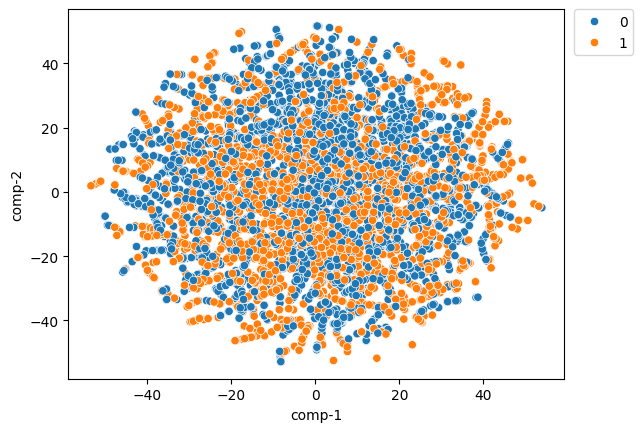

In [ ]:
# t-SNE Visualization
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=3, learning_rate='auto', init='random', perplexity=3).fit_transform(features)
df = pd.DataFrame()
df["y"] = y_train
df["comp-1"] = X_embedded[:,0]
df["comp-2"] = X_embedded[:,1]
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), data=df).set(title="")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

In [ ]:

# Save the model
final_model.save('VIT_model.h5')


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - accuracy: 0.8511 - loss: 0.3532
Epoch 2/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9180 - loss: 0.2105
Epoch 3/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9297 - loss: 0.1857
Epoch 4/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.9339 - loss: 0.1661
Epoch 5/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.9418 - loss: 0.1548
Epoch 6/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9445 - loss: 0.1513
Epoch 7/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9499 - loss: 0.1310
Epoch 8/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step - accuracy: 0.9485 - loss: 0.1402
Epoch 9/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.9460 - loss: 0.1382
Epoch 10/10
301/301 ━━━━━━━━━━━━━━━━━━━━ 9s 30ms/step - accuracy: 0.9511 - loss: 0.1281
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.9079 - loss: 0.2600


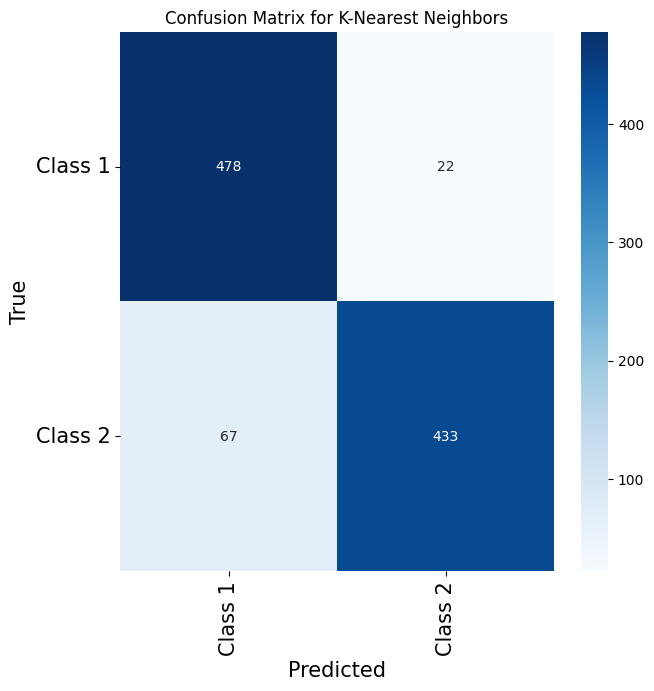

Model: Logistic Regression
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


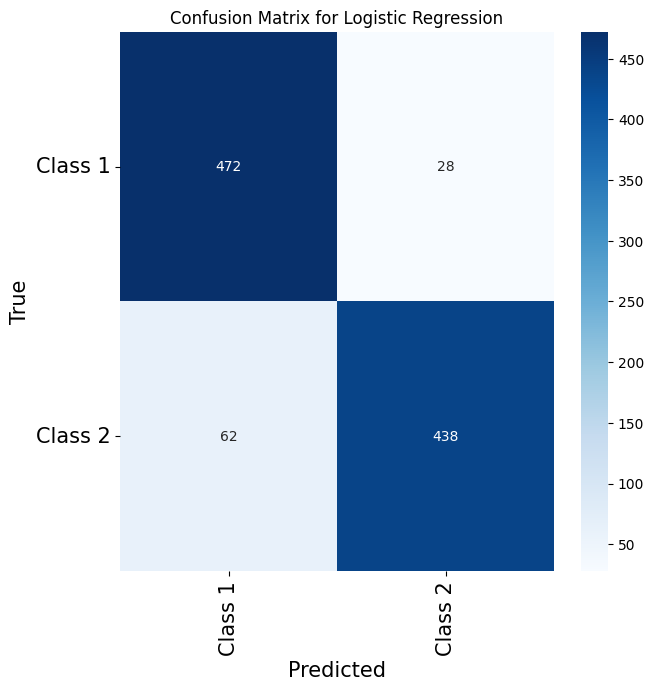

Model: Random Forest
Accuracy: 0.911
Precision: 0.911
Recall: 0.911
F1 Score: 0.911


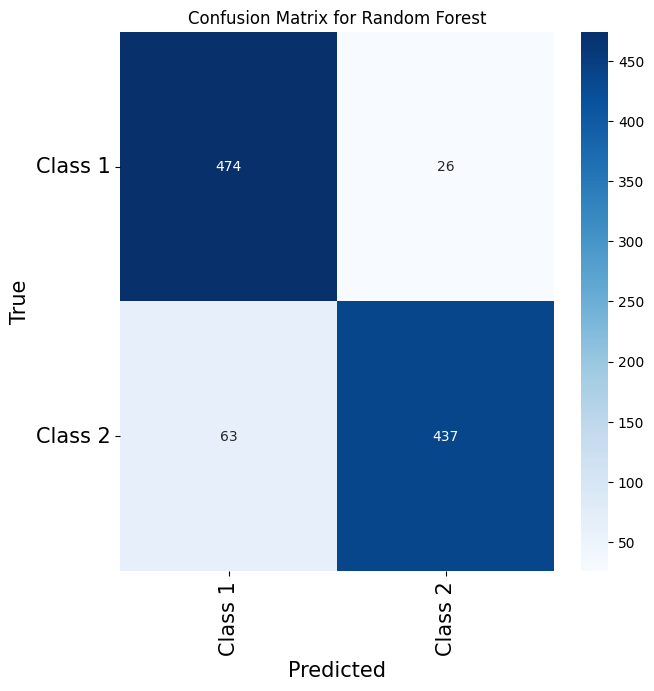

Model: XGBoost
Accuracy: 0.913
Precision: 0.913
Recall: 0.913
F1 Score: 0.9130000000000001


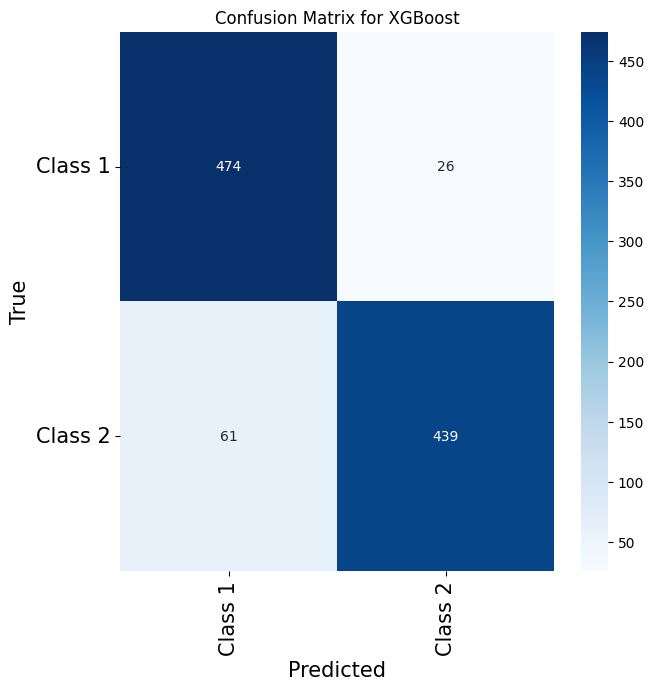

Model: SVC
Accuracy: 0.91
Precision: 0.91
Recall: 0.91
F1 Score: 0.91


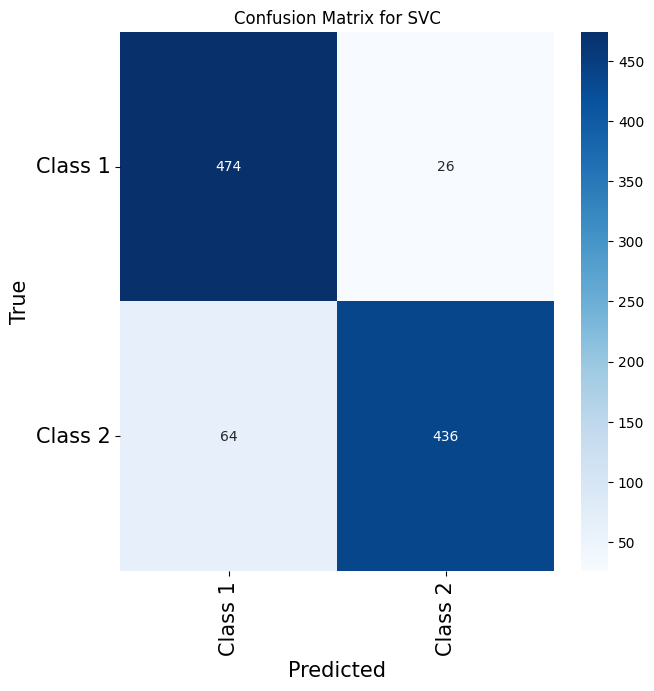

Model: Ensemble Voting Classifier
Accuracy: 0.909
Precision: 0.909
Recall: 0.909
F1 Score: 0.909


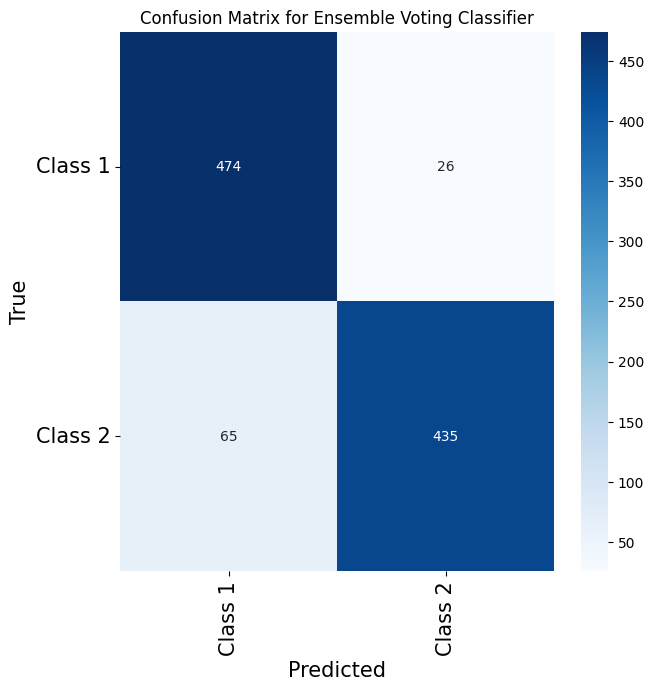

+---------------------+------------+-------------+----------+------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score |
+=====================+============+=============+==========+============+
| KNN                 |      0.911 |       0.911 |    0.911 |      0.911 |
+---------------------+------------+-------------+----------+------------+
| Logistic Regression |      0.91  |       0.91  |    0.91  |      0.91  |
+---------------------+------------+-------------+----------+------------+
| Random Forest       |      0.911 |       0.911 |    0.911 |      0.911 |
+---------------------+------------+-------------+----------+------------+
| XGBoost             |      0.913 |       0.913 |    0.913 |      0.913 |
+---------------------+------------+-------------+----------+------------+
| SVC                 |      0.91  |       0.91  |    0.91  |      0.91  |
+---------------------+------------+-------------+----------+------------+
| Ensemble            |  

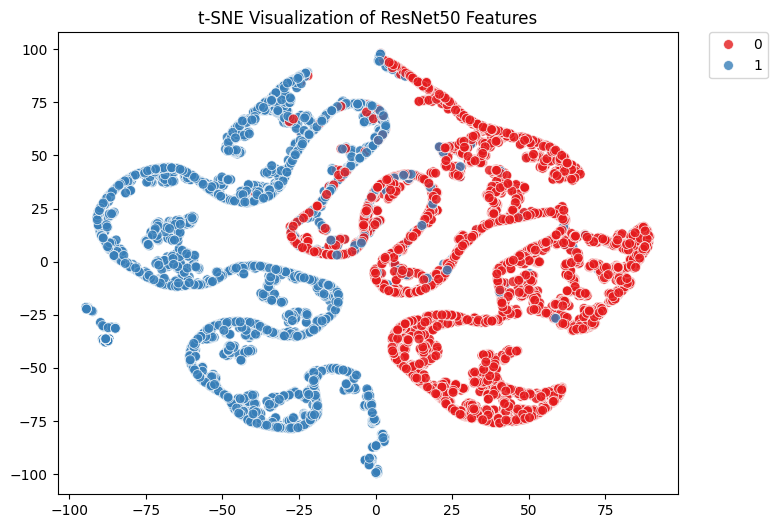

In [ ]:
# prompt: Build a ResNet50 model for feature extracting and perform ML models like above

import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np

# Load the ResNet50 model with ImageNet weights, excluding the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a global average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a dense layer for classification
predictions = Dense(3, activation='softmax')(x)  # Assuming 3 classes

# Create the final model
resnet_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
resnet_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# One-hot encode the target labels
y_train_encoded = tf.keras.utils.to_categorical(y_train, num_classes=3)  # Assuming 3 classes

# Train the model
resnet_model.fit(x_train, y_train_encoded, epochs=10, batch_size=32)

# One-hot encode the test labels
y_test_encoded = tf.keras.utils.to_categorical(y_test, num_classes=3)

# Evaluate the model on the test data
accuracy = resnet_model.evaluate(x_test, y_test_encoded)[1]
print("Accuracy:", accuracy)

# Extract features from the trained ResNet50 model
feature_extractor_resnet = resnet_model.predict(x_train)
fe_test_resnet = resnet_model.predict(x_test)

features_resnet = feature_extractor_resnet.reshape(feature_extractor_resnet.shape[0], -1)
f_test_resnet = fe_test_resnet.reshape(fe_test_resnet.shape[0], -1)

# Standardize the features
scaler = StandardScaler()
features_resnet = scaler.fit_transform(features_resnet)
f_test_resnet = scaler.transform(f_test_resnet)

# Labels
labels = ['Class 1', 'Class 2']
# Dictionary to store results
results_resnet = {}

# K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(features_resnet, y_train)
y_pred_knn = knn.predict(f_test_resnet)
evaluate_model(y_test, y_pred_knn, labels, "K-Nearest Neighbors")
results_resnet['KNN'] = [accuracy_score(y_test, y_pred_knn), precision_score(y_test, y_pred_knn, average='micro'), recall_score(y_test, y_pred_knn, average='micro'), f1_score(y_test, y_pred_knn, average='micro')]

# Logistic Regression
lrm = LogisticRegression(multi_class='multinomial', solver='lbfgs')
lrm.fit(features_resnet, y_train)
y_pred_lr = lrm.predict(f_test_resnet)
evaluate_model(y_test, y_pred_lr, labels, "Logistic Regression")
results_resnet['Logistic Regression'] = [accuracy_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lr, average='micro'), recall_score(y_test, y_pred_lr, average='micro'), f1_score(y_test, y_pred_lr, average='micro')]

# Random Forest
RF_model = RandomForestClassifier(n_estimators=50, random_state=42)
RF_model.fit(features_resnet, y_train)
y_pred_rf = RF_model.predict(f_test_resnet)
evaluate_model(y_test, y_pred_rf, labels, "Random Forest")
results_resnet['Random Forest'] = [accuracy_score(y_test, y_pred_rf), precision_score(y_test, y_pred_rf, average='micro'), recall_score(y_test, y_pred_rf, average='micro'), f1_score(y_test, y_pred_rf, average='micro')]

# XGBoost
xgb_classifier = xgb.XGBClassifier(tree_method="auto")
xgb_classifier.fit(features_resnet, y_train)
y_pred_xgb = xgb_classifier.predict(f_test_resnet)
evaluate_model(y_test, y_pred_xgb, labels, "XGBoost")
results_resnet['XGBoost'] = [accuracy_score(y_test, y_pred_xgb), precision_score(y_test, y_pred_xgb, average='micro'), recall_score(y_test, y_pred_xgb, average='micro'), f1_score(y_test, y_pred_xgb, average='micro')]

# SVC
svc = SVC(C=0.65, random_state=0, kernel='rbf')
svc.fit(features_resnet, y_train)
y_pred_svc = svc.predict(f_test_resnet)
evaluate_model(y_test, y_pred_svc, labels, "SVC")
results_resnet['SVC'] = [accuracy_score(y_test, y_pred_svc), precision_score(y_test, y_pred_svc, average='micro'), recall_score(y_test, y_pred_svc, average='micro'), f1_score(y_test, y_pred_svc, average='micro')]

# Ensemble Voting Classifier
final_model_resnet = VotingClassifier(estimators=[
    ('rf', RF_model),
    ('xgb', xgb_classifier),
    ('knn', knn),
    ('svc', svc),
    ('lr', lrm)
], voting='hard')

final_model_resnet.fit(features_resnet, y_train)
y_pred_final = final_model_resnet.predict(f_test_resnet)
evaluate_model(y_test, y_pred_final, labels, "Ensemble Voting Classifier")
results_resnet['Ensemble'] = [accuracy_score(y_test, y_pred_final), precision_score(y_test, y_pred_final, average='micro'), recall_score(y_test, y_pred_final, average='micro'), f1_score(y_test, y_pred_final, average='micro')]

# Create a table with the results
table_resnet = [
    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    ['KNN', results_resnet['KNN'][0], results_resnet['KNN'][1], results_resnet['KNN'][2], results_resnet['KNN'][3]],
    ['Logistic Regression', results_resnet['Logistic Regression'][0], results_resnet['Logistic Regression'][1], results_resnet['Logistic Regression'][2], results_resnet['Logistic Regression'][3]],
    ['Random Forest', results_resnet['Random Forest'][0], results_resnet['Random Forest'][1], results_resnet['Random Forest'][2], results_resnet['Random Forest'][3]],
    ['XGBoost', results_resnet['XGBoost'][0], results_resnet['XGBoost'][1], results_resnet['XGBoost'][2], results_resnet['XGBoost'][3]],
    ['SVC', results_resnet['SVC'][0], results_resnet['SVC'][1], results_resnet['SVC'][2], results_resnet['SVC'][3]],
    ['Ensemble', results_resnet['Ensemble'][0], results_resnet['Ensemble'][1], results_resnet['Ensemble'][2], results_resnet['Ensemble'][3]],
]

# Print the table
print(tabulate(table_resnet, headers='firstrow', tablefmt='grid'))

# t-SNE Visualization
X_embedded_resnet = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(features_resnet)

# Plot t-SNE
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_embedded_resnet[:, 0], y=X_embedded_resnet[:, 1], hue=y_train, palette='Set1', s=50, alpha=0.8)
plt.title('t-SNE Visualization of ResNet50 Features')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


In [ ]:
# prompt: print parameter table for the above resnet50 model

from tabulate import tabulate

# Define the ResNet50 model parameters
parameters_resnet = {
    # General parameters
    "input_shape": (128, 128, 3),
    "num_classes": 3,

    # Base model parameters
    "base_model": "ResNet50",
    "weights": "imagenet",
    "include_top": true,

    # Training parameters
    "optimizer": "adam",
    "loss": "categorical_crossentropy",
    "metrics": ["accuracy"],
    "epochs": 10,
    "batch_size": 32,
}

# Convert the parameters dictionary to a list of lists for tabulate
table_data_resnet = [[key, value] for key, value in parameters_resnet.items()]

# Print the parameter table with boxes
print(tabulate(table_data_resnet, headers=["Parameter", "Value"], tablefmt="grid"))


Model: Ensemble of Ensembles
Accuracy: 0.889
Precision: 0.889
Recall: 0.889
F1 Score: 0.889


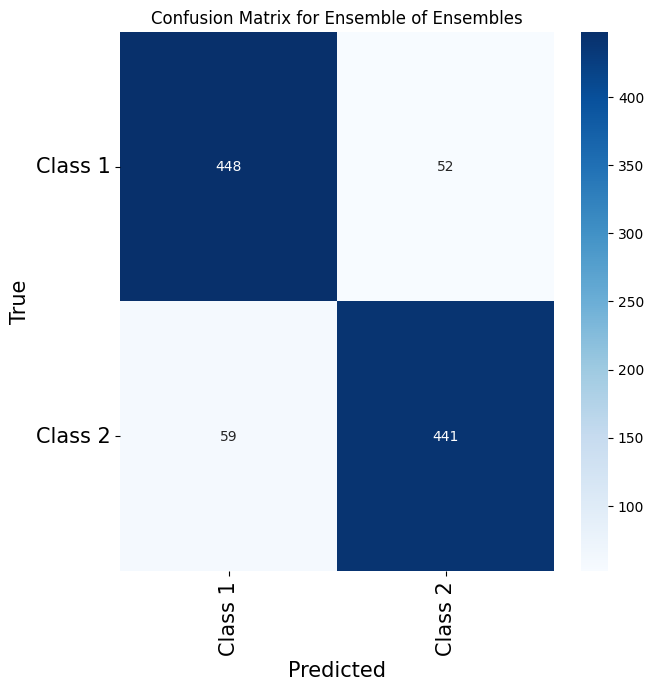

+-----------------------+------------+-------------+----------+------------+
| Model                 |   Accuracy |   Precision |   Recall |   F1 Score |
+=======================+============+=============+==========+============+
| Ensemble of Ensembles |      0.889 |       0.889 |    0.889 |      0.889 |
+-----------------------+------------+-------------+----------+------------+


In [ ]:
# prompt: perform ensemble of from above 3 ensemble codes VGG 19,capsnet and vit

from sklearn.ensemble import VotingClassifier

# Define the base models
estimators = [
    ('vgg19', final_model),
    ('vgg16', final_model_0),
    ('capsnet', final_model_1),
    ('vit', final_model_2),
    ('resnet', final_model_resnet)
]

# Create the ensemble model
ensemble_model = VotingClassifier(estimators=estimators, voting='hard')

# Train the ensemble model
ensemble_model.fit(features, y_train)

# Evaluate the ensemble model
y_pred_ensemble = ensemble_model.predict(f_test)
evaluate_model(y_test, y_pred_ensemble, labels, "Ensemble of Ensembles")

# Store the results
results_ensemble = [accuracy_score(y_test, y_pred_ensemble), precision_score(y_test, y_pred_ensemble, average='micro'), recall_score(y_test, y_pred_ensemble, average='micro'), f1_score(y_test, y_pred_ensemble, average='micro')]

# Print the results table
table3 = [
    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'],
    ['Ensemble of Ensembles', results_ensemble[0], results_ensemble[1], results_ensemble[2], results_ensemble[3]],
]

print(tabulate(table3, headers='firstrow', tablefmt='grid'))


In [ ]:
# prompt: using the above ensembling model build a

# Assuming 'ensemble_model' is the trained ensemble model from the preceding code

# Save the trained ensemble model to a file
with open(r"/content/drive/MyDrive/melanoma_cancer_dataset/ensemble_of_ensembles_model.pkl", "wb") as f:
    pickle.dump(ensemble_model, f)


In [ ]:
import os
import numpy as np
import cv2 as cv
from keras.models import load_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [ ]:
import pickle

model_path = '/content/drive/MyDrive/melanoma_cancer_dataset/model.pkl'

# Load the model with pickle
with open(model_path, 'rb') as file:
    model = pickle.load(file)


In [ ]:
import os

model_path = '/content/drive/MyDrive/melanoma_cancer_dataset/model.pkl'
assert os.path.exists(model_path), "Model file not found."


In [ ]:
def prepare_image_for_rf(image_path):
    img = cv.imread(image_path, cv.IMREAD_COLOR)
    if img is None:
        raise ValueError(f"Image at {image_path} could not be loaded. Please check the file path.")

    # Resize to the size used during training (find out the correct size)
    img_resized = cv.resize(img, (32, 32))  # Assuming the training size was 32x32
    img_array = np.array(img_resized)
    img_array = img_array.astype('float32') / 255.0  # Normalize to [0, 1]

    # Flatten to match the expected feature count
    img_array = img_array.flatten()  # Flatten the image to 1D

    # Use only the first 512 features (if model was trained on 512 features)
    img_array = img_array[:512]

    img_array = np.expand_dims(img_array, axis=0)  # Ensure shape is (1, n_features)
    return img_array


In [ ]:
image_path = '/content/drive/MyDrive/melanoma_cancer_dataset/test/malignant/melanoma_10105.jpg'
image = prepare_image_for_rf(image_path)

# Predict
prediction = model.predict(image)

result = "Malignant" if prediction[0] == 0 else "Benign"

print(f"The model predicts that the image is: {result}")


The model predicts that the image is: Benign


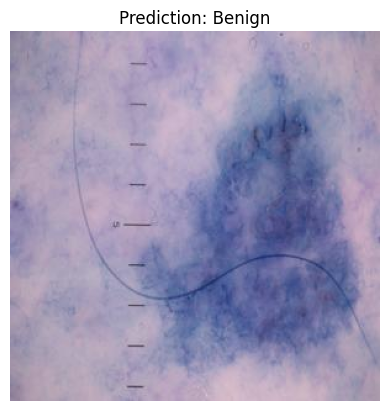

In [ ]:
  plt.imshow(cv.imread(image_path))
  plt.title(f"Prediction: {result}")
  plt.axis('off')
  plt.show()


In [ ]:
# prompt: load the model_vit.pkl from the google drive

import pickle
# Load the model from the file
with open('/content/drive/MyDrive/melanoma_cancer_dataset/model_vit.pkl', 'rb') as f:
    loaded_model = pickle.load(f)
